# IS453 Financial Analytics Group Assignment (Group G3)
## Credit scorecard

1. Identify a business opportunity and explain how credit analysis data analytics can help
exploit a market opportunity and support a profitable business proposition
2. Get the audience to understand and have confidence in your data analysis approach
3. Propose the next steps for rolling out and testing the scorecard that you develop and
highlight any potential risks and pitfalls and how they can be mitigated

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scorecardpy as sc
import pprint

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

# Data

In [2]:
df_app = pd.read_csv('IS453 Group Assignment - Application Data.csv')
df_bur = pd.read_csv('IS453 Group Assignment - Bureau Data.csv')

Data Set - Application Data

In [3]:
df_app.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

Data Set - Bureau Data

In [4]:
df_bur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


# Business opportunity 
Housing loans for **singles** looking to buy primary real estate property.

## Preprocessing for Application Data

In [5]:
# reduce data set to only singles that do not own real estate (exclude singles who currently own real estate)
df_app = df_app[(df_app['NAME_FAMILY_STATUS'] == 'Single / not married') & (df_app['FLAG_OWN_REALTY'] == 'N')]
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
56      100064       0         Cash loans           F            N   
61      100072       0         Cash loans           M            N   
63      100075       0         Cash loans           F            N   
87      100102       0         Cash loans           F            N   
95      100113       0         Cash loans           M            Y   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
56               N             0           67500.0    298728.0      15381.0   
61               N             0          180000.0   1080000.0      44118.0   
63               N             0          112500.0     95940.0      10462.5   
87               N             1          126000.0    327024.0      10264.5   
95               N             0           76500.0    135000.0       6696.0   

    ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
56  ...                 0                0                0                0   
61  ...                 0                0                0                0   
63  ...                 0                0                0                0   
87  ...                 0                0                0                0   
95  ...                 0                0                0                0   

   AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
56                        0.0                       0.0   
61                        0.0                       0.0   
63                        0.0                       0.0   
87                        0.0                       0.0   
95                        0.0                       0.0   

    AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
56                         0.0                        0.0   
61                         0.0                        0.0   
63                         0.0                        0.0   
87                         0.0                        6.0   
95                         0.0                        0.0   

    AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
56                        0.0                         0.0  
61                        0.0                         4.0  
63                        0.0                         5.0  
87                        0.0                         0.0  
95                        0.0                         2.0  

[5 rows x 122 columns]

In [6]:
# identify variables that make most sense
# keep SK_ID_CURR to join with bureau data
app_kept = ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 
               'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 
               'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
               'DAYS_EMPLOYED', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
               'LIVE_CITY_NOT_WORK_CITY', 'OCCUPATION_TYPE', 'NAME_EDUCATION_TYPE',
               'NAME_INCOME_TYPE', 'REGION_RATING_CLIENT_W_CITY', 'NAME_HOUSING_TYPE','NAME_TYPE_SUITE','DEF_60_CNT_SOCIAL_CIRCLE'
]

df_app_kept = df_app[app_kept]
df_app_kept.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
56      100064       0             0           67500.0    298728.0   
61      100072       0             0          180000.0   1080000.0   
63      100075       0             0          112500.0     95940.0   
87      100102       0             1          126000.0    327024.0   
95      100113       0             0           76500.0    135000.0   

    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
56      15381.0         202500.0                    0.019101   
61      44118.0        1080000.0                    0.010006   
63      10462.5          90000.0                    0.004960   
87      10264.5         270000.0                    0.024610   
95       6696.0         135000.0                    0.028663   

    DAYS_REGISTRATION  CNT_FAM_MEMBERS  ... REG_CITY_NOT_LIVE_CITY  \
56            -2019.0              1.0  ...                      0   
61            -4557.0              1.0  ...                      0   
63            -5246.0              1.0  ...                      0   
87            -6913.0              2.0  ...                      0   
95            -9176.0              1.0  ...                      0   

    REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY     OCCUPATION_TYPE  \
56                       0                        0                 NaN   
61                       0                        0         Sales staff   
63                       0                        0                 NaN   
87                       0                        0            Laborers   
95                       0                        0  Low-skill Laborers   

              NAME_EDUCATION_TYPE  NAME_INCOME_TYPE  \
56  Secondary / secondary special         Pensioner   
61              Incomplete higher           Working   
63               Higher education           Working   
87  Secondary / secondary special           Working   
95  Secondary / secondary special           Working   

    REGION_RATING_CLIENT_W_CITY    NAME_HOUSING_TYPE  NAME_TYPE_SUITE  \
56                            2  Municipal apartment           Family   
61                            1         With parents    Unaccompanied   
63                            2    House / apartment           Family   
87                            2    House / apartment    Unaccompanied   
95                            2    House / apartment    Unaccompanied   

   DEF_60_CNT_SOCIAL_CIRCLE  
56                      0.0  
61                      0.0  
63                      0.0  
87                      0.0  
95                      0.0  

[5 rows x 26 columns]

In [7]:
# adjust DAYS_% variables to MONTHS and remove negative
df_app_kept['AGE'] = -df_app_kept['DAYS_BIRTH']/365
df_app_kept['MONTHS_EMPLOYED'] = -df_app_kept['DAYS_EMPLOYED']/30
df_app_kept['MONTHS_REGISTRATION'] = -df_app_kept['DAYS_REGISTRATION']/30

df_app_kept.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION'], axis = 1, inplace=True)

In [8]:
# resetrict age to 35 - 60
df_app_kept = df_app_kept[(df_app_kept['AGE'] >= 35) & (df_app_kept['AGE'] < 60)]
df_app_kept.shape

(6102, 26)

In [9]:
# bureau data modification / engineering
bur_kept = ['SK_ID_CURR', 'CREDIT_ACTIVE','AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_OVERDUE', 'AMT_CREDIT_SUM_DEBT', 'CNT_CREDIT_PROLONG', 'AMT_ANNUITY',
           ]
df_bur_kept = df_bur[bur_kept]
df_bur_kept.head()

SK_ID_CURR CREDIT_ACTIVE  AMT_CREDIT_SUM  AMT_CREDIT_SUM_OVERDUE  \
0      215354        Closed         91323.0                     0.0   
1      215354        Active        225000.0                     0.0   
2      215354        Active        464323.5                     0.0   
3      215354        Active         90000.0                     0.0   
4      215354        Active       2700000.0                     0.0   

   AMT_CREDIT_SUM_DEBT  CNT_CREDIT_PROLONG  AMT_ANNUITY  
0                  0.0                   0          NaN  
1             171342.0                   0          NaN  
2                  NaN                   0          NaN  
3                  NaN                   0          NaN  
4                  NaN                   0          NaN

## Preprocessing for Bureau data

In [10]:
# Create a new df_bur_modified
df_bur_modified = pd.DataFrame()

# Add SK_ID_CURR to facilitate joins
df_bur_modified['SK_ID_CURR'] = df_bur_kept['SK_ID_CURR'].unique()

# Join groupby table for the average of CNT_CREDIT_PROLONG
df_bur_modified = df_bur_modified.merge(
    pd.DataFrame(df_bur_kept.groupby('SK_ID_CURR')['CNT_CREDIT_PROLONG'].mean()),
    on='SK_ID_CURR', how='left')

# Join groupby table for the sum of AMT_ANNUITY
df_bur_modified = df_bur_modified.merge(
    pd.DataFrame(df_bur_kept.groupby('SK_ID_CURR')['AMT_ANNUITY'].sum()),
    on='SK_ID_CURR', how='left')

# Join groupby table for the sum of AMT_CREDIT_SUM_OVERDUE
df_bur_modified = df_bur_modified.merge(
    pd.DataFrame(df_bur_kept.groupby('SK_ID_CURR')['AMT_CREDIT_SUM_OVERDUE'].sum()),
    on='SK_ID_CURR', how='left')

# Join groupby table for the sum of AMT_CREDIT_SUM_DEBT
df_bur_modified = df_bur_modified.merge(
    pd.DataFrame(df_bur_kept.groupby('SK_ID_CURR')['AMT_CREDIT_SUM_DEBT'].sum()),
    on='SK_ID_CURR', how='left')

# Join groupby table for the most frequent credit type and rename the column
# df_bur_modified = df_bur_modified.merge(
#     pd.DataFrame(df_bur_kept.groupby('SK_ID_CURR')['CREDIT_TYPE'].agg(lambda x: x.value_counts().idxmax())),
#     on='SK_ID_CURR', how='left')

df_bur_modified.columns = [
    'SK_ID_CURR', 'AVG_CNT_CREDIT_PROLONG', 'SUM_AMT_ANNUITY',
    'SUM_AMT_CREDIT_SUM_OVERDUE', 'SUM_AMT_CREDIT_SUM_DEBT', 
#     'MOST_FREQUENT_CREDIT_TYPE'
]

df_bur_modified


SK_ID_CURR  AVG_CNT_CREDIT_PROLONG  SUM_AMT_ANNUITY  \
0           215354                     0.0              0.0   
1           162297                     0.0              0.0   
2           402440                     0.0              0.0   
3           238881                     0.0              0.0   
4           222183                     0.0              0.0   
...            ...                     ...              ...   
305806      207190                     0.0              0.0   
305807      324956                     0.0              0.0   
305808      448157                     0.0              0.0   
305809      345866                     0.0          17140.5   
305810      235871                     0.0              0.0   

        SUM_AMT_CREDIT_SUM_OVERDUE  SUM_AMT_CREDIT_SUM_DEBT  
0                              0.0                284463.18  
1                              0.0                     0.00  
2                              0.0                 76905.00  
3                              0.0                552730.50  
4                              0.0               1185081.84  
...                            ...                      ...  
305806                         0.0                     0.00  
305807                         0.0                     0.00  
305808                         0.0               1076809.50  
305809                         0.0                     0.00  
305810                         0.0                     0.00  

[305811 rows x 5 columns]

In [11]:
# join bureau data on main
df = df_app_kept.merge(df_bur_modified, on = 'SK_ID_CURR', how = 'left')
df.drop('SK_ID_CURR', axis=1, inplace=True)
df

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0          0             0           67500.0    298728.0      15381.0   
1          0             1          126000.0    327024.0      10264.5   
2          0             0           76500.0    135000.0       6696.0   
3          0             0          135000.0    182016.0      11772.0   
4          1             0          112500.0    417024.0      25330.5   
...      ...           ...               ...         ...          ...   
6097       0             0          256500.0    781920.0      41400.0   
6098       1             1          135000.0    316125.0      15372.0   
6099       0             1          360000.0   1417185.0      39100.5   
6100       0             0           90000.0    119448.0       7632.0   
6101       0             0          270000.0   1262583.0      40860.0   

      AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  CNT_FAM_MEMBERS  \
0            202500.0                    0.019101              1.0   
1            270000.0                    0.024610              2.0   
2            135000.0                    0.028663              1.0   
3            144000.0                    0.019101              1.0   
4            360000.0                    0.025164              1.0   
...               ...                         ...              ...   
6097         675000.0                    0.046220              1.0   
6098         261000.0                    0.030755              2.0   
6099        1237500.0                    0.018029              2.0   
6100          94500.0                    0.024610              1.0   
6101        1102500.0                    0.025164              1.0   

           ORGANIZATION_TYPE  EXT_SOURCE_1  ...    NAME_HOUSING_TYPE  \
0                        XNA           NaN  ...  Municipal apartment   
1          Transport: type 4      0.414794  ...    House / apartment   
2                Agriculture      0.475762  ...    House / apartment   
3     Business Entity Type 3           NaN  ...    House / apartment   
4                        XNA           NaN  ...    House / apartment   
...                      ...           ...  ...                  ...   
6097           Trade: type 7      0.896452  ...    House / apartment   
6098                 Housing           NaN  ...         With parents   
6099                  School      0.657671  ...    House / apartment   
6100       Transport: type 4      0.323674  ...    House / apartment   
6101                   Other      0.662429  ...    House / apartment   

      NAME_TYPE_SUITE  DEF_60_CNT_SOCIAL_CIRCLE        AGE  MONTHS_EMPLOYED  \
0              Family                       0.0  59.235616    -12174.766667   
1       Unaccompanied                       0.0  39.235616         6.400000   
2       Unaccompanied                       0.0  41.471233       266.000000   
3       Unaccompanied                       0.0  45.265753        48.366667   
4              Family                       0.0  37.553425    -12174.766667   
...               ...                       ...        ...              ...   
6097    Unaccompanied                       0.0  52.347945         9.533333   
6098    Unaccompanied                       0.0  37.293151        84.666667   
6099    Unaccompanied                       0.0  38.383562        39.566667   
6100    Unaccompanied                       0.0  50.202740        37.566667   
6101    Unaccompanied                       0.0  41.545205       155.933333   

     MONTHS_REGISTRATION AVG_CNT_CREDIT_PROLONG SUM_AMT_ANNUITY  \
0              67.300000                   0.00        4653.000   
1             230.433333                   0.00           0.000   
2             305.866667                   0.00        3997.485   
3             136.700000                   0.00           0.000   
4             260.300000                   0.00       12163.500   
...                  ...                    ...             ...   
6097 

In [12]:
df['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      5417
Family              474
Children             54
Other_B              44
Spouse, partner      37
Other_A              20
Group of people       5
Name: count, dtype: int64

In [13]:
df['NAME_TYPE_SUITE'].isnull().sum()

51

# Visualisation of data subset

As a result of the new data subset from the business opportunity, we re-examine the chosen variables and their relationship with TARGET.

# Univariate Analysis

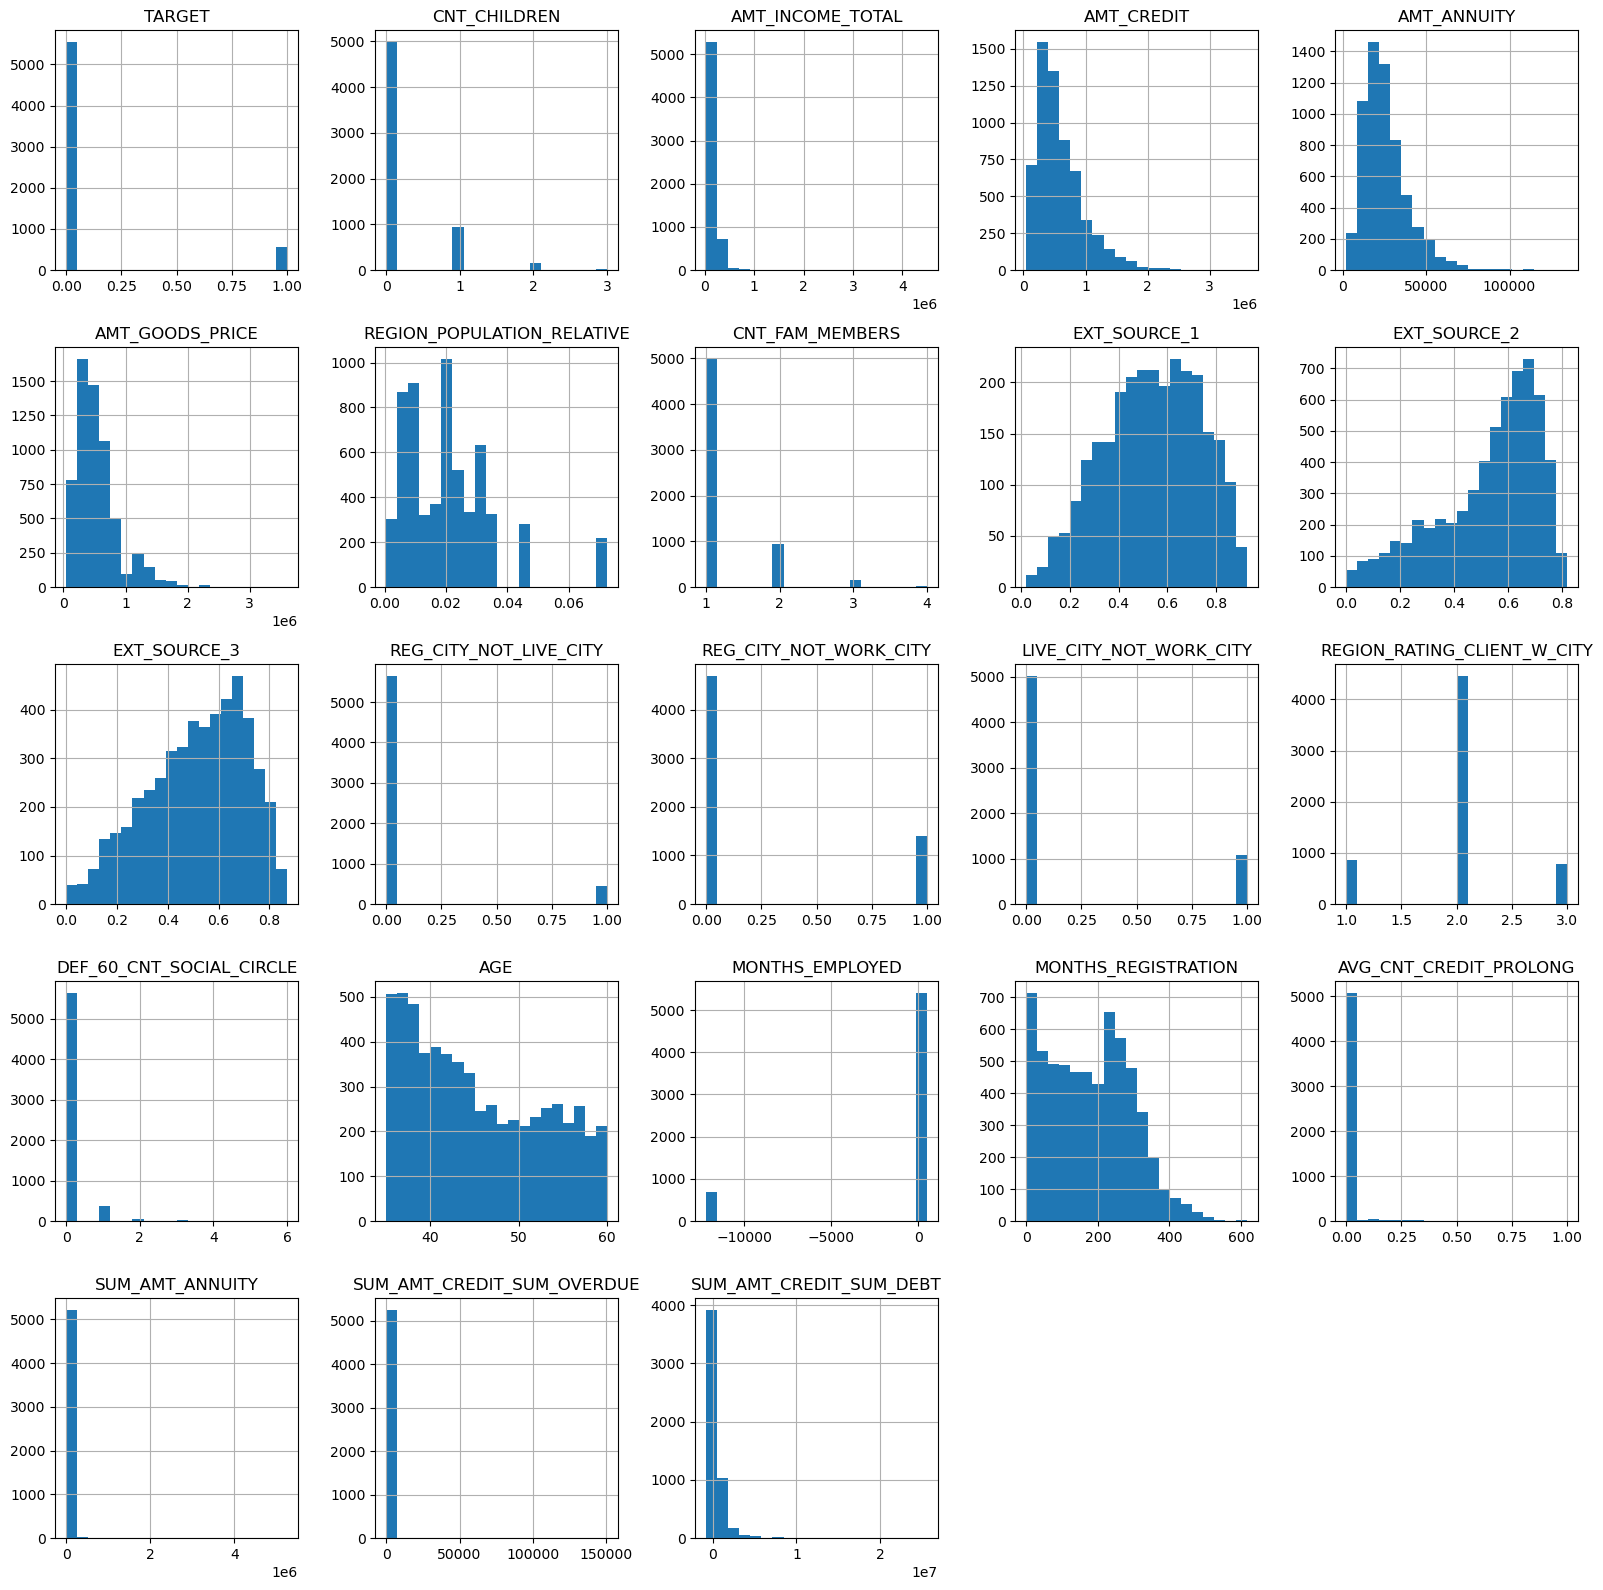

In [14]:
# histogram plots for numeric 
df.hist(figsize = (16,16), bins = 20)
plt.tight_layout()
plt.show()

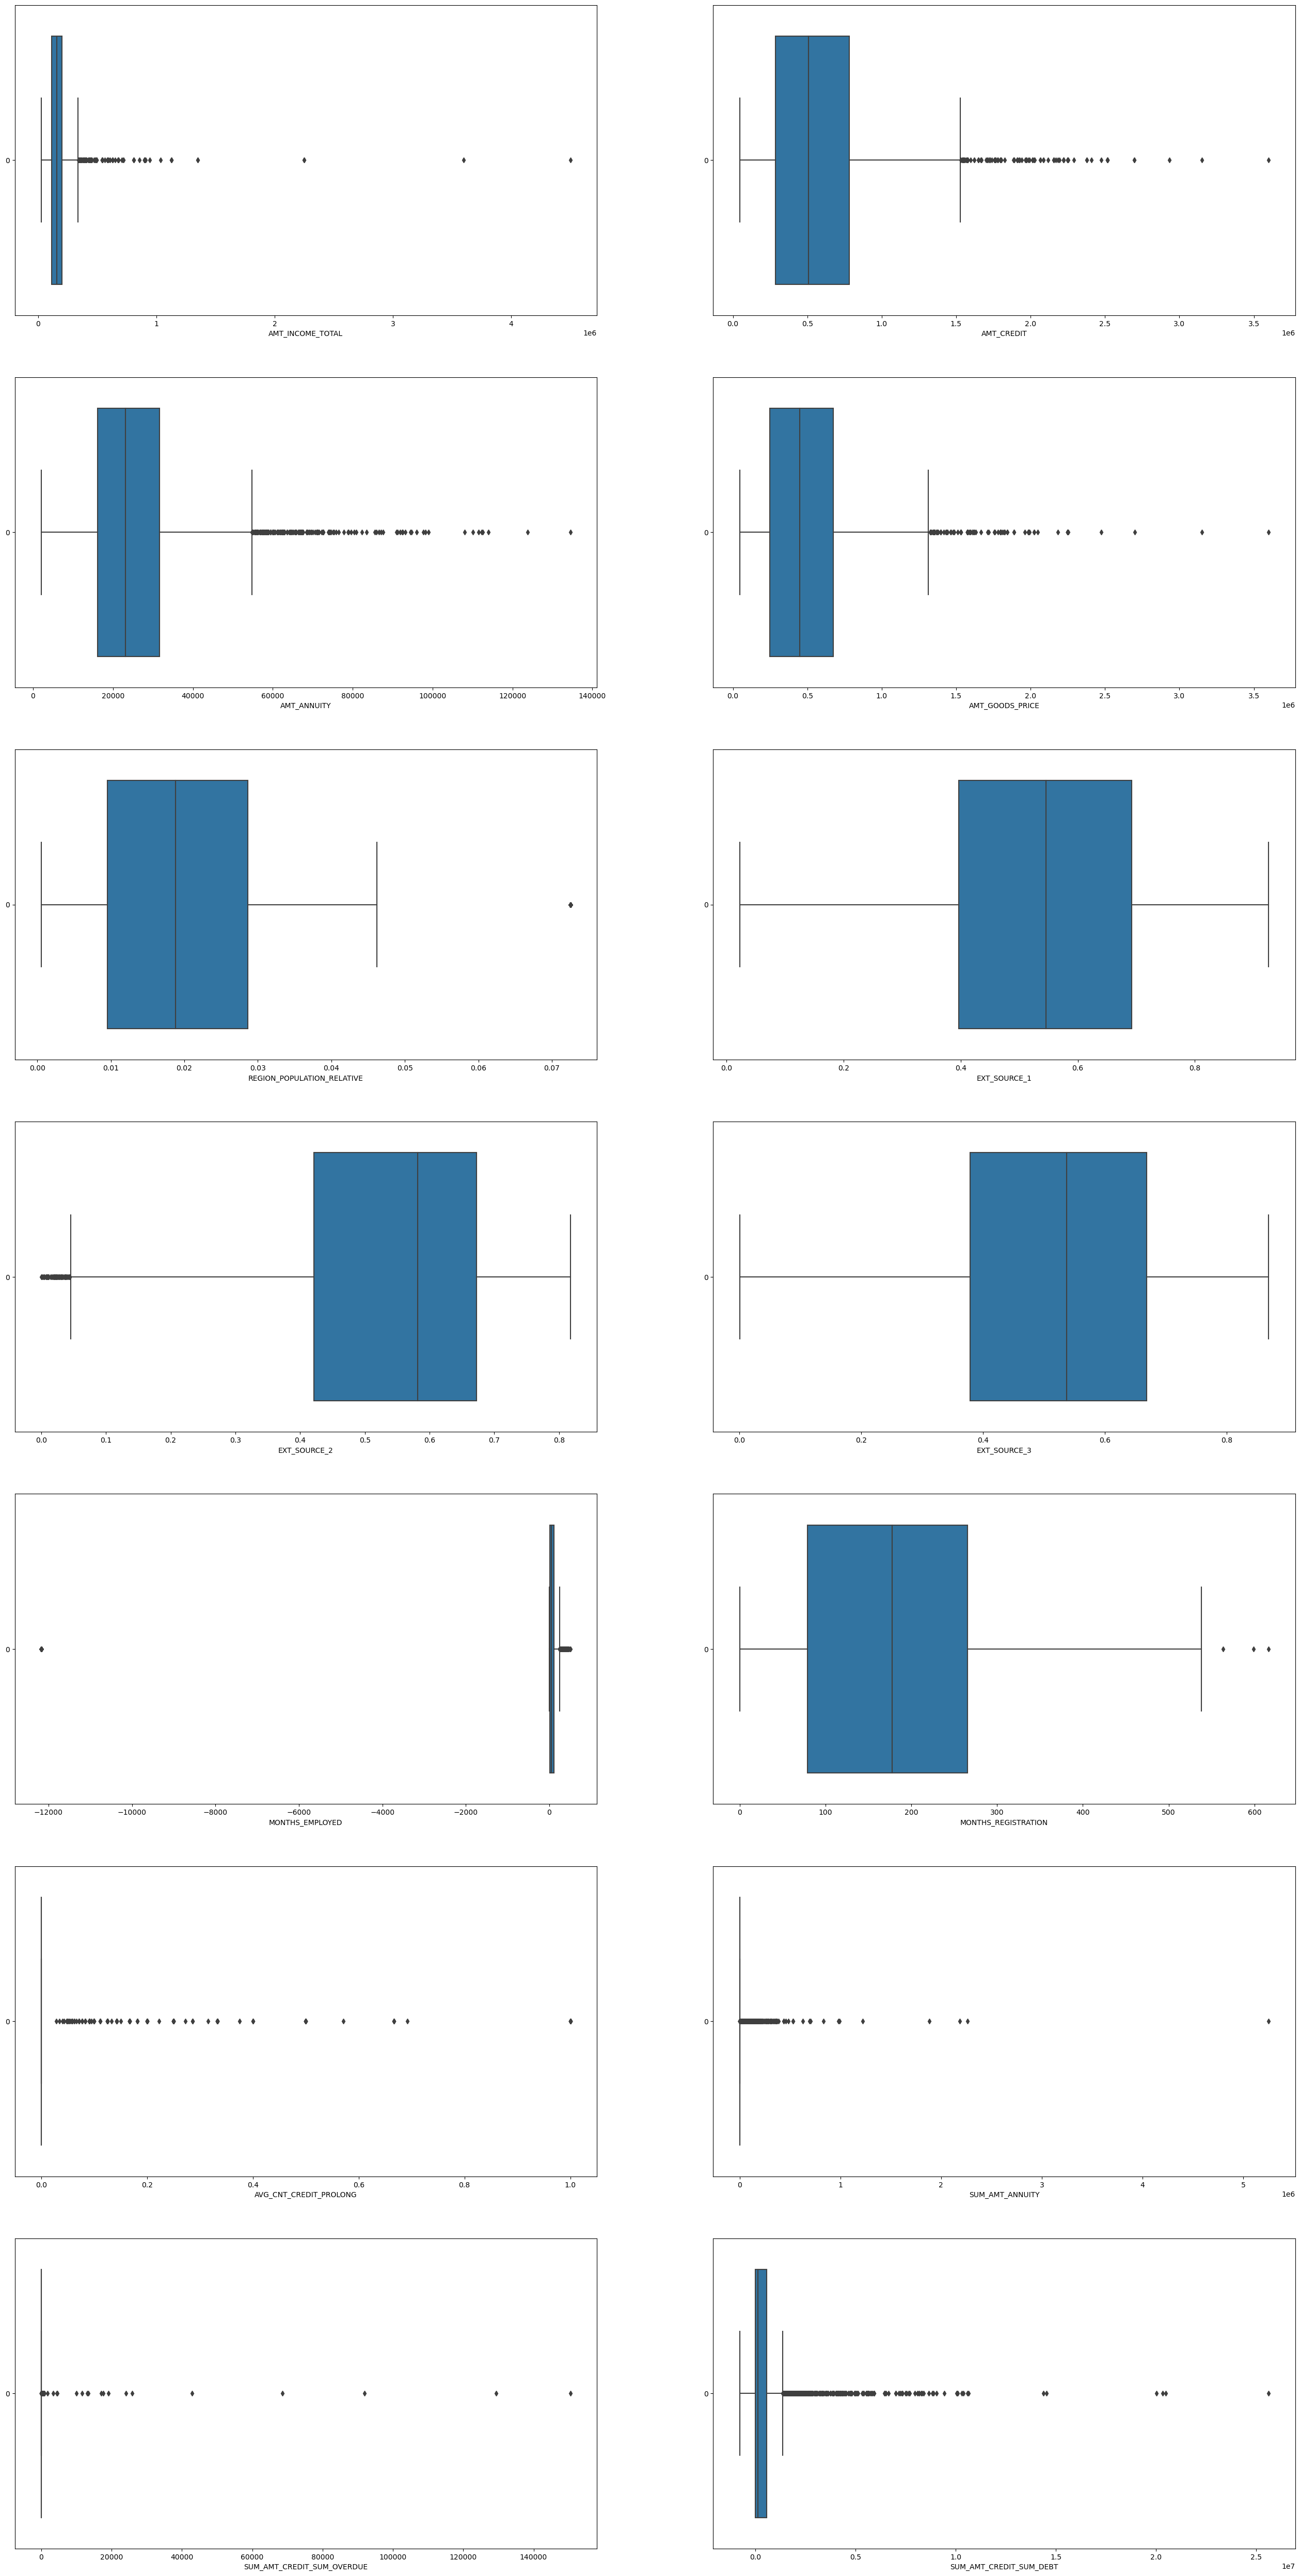

In [15]:
# create boxplots for continuous variables

columns_to_plot = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','MONTHS_EMPLOYED','MONTHS_REGISTRATION', 'AVG_CNT_CREDIT_PROLONG', 'SUM_AMT_ANNUITY',
    'SUM_AMT_CREDIT_SUM_OVERDUE', 'SUM_AMT_CREDIT_SUM_DEBT']

row_count=int(np.ceil(len(columns_to_plot)/2))

# Create the figure and two subplots
fig, axes = plt.subplots(ncols=2, nrows=row_count, figsize=(32, 64))

for i, axis in enumerate(fig.axes):
    sns.boxplot(ax=axis, data=df[columns_to_plot[i]],orient='h')
    axis.set_xlabel(str(columns_to_plot[i]))
    if i == len(columns_to_plot)-1: 
         break
    
# Show the plot
plt.show()

Invalid Observations in MONTHS_EMPLOYED: -12000 ~ 1000 years employed

<Axes: >

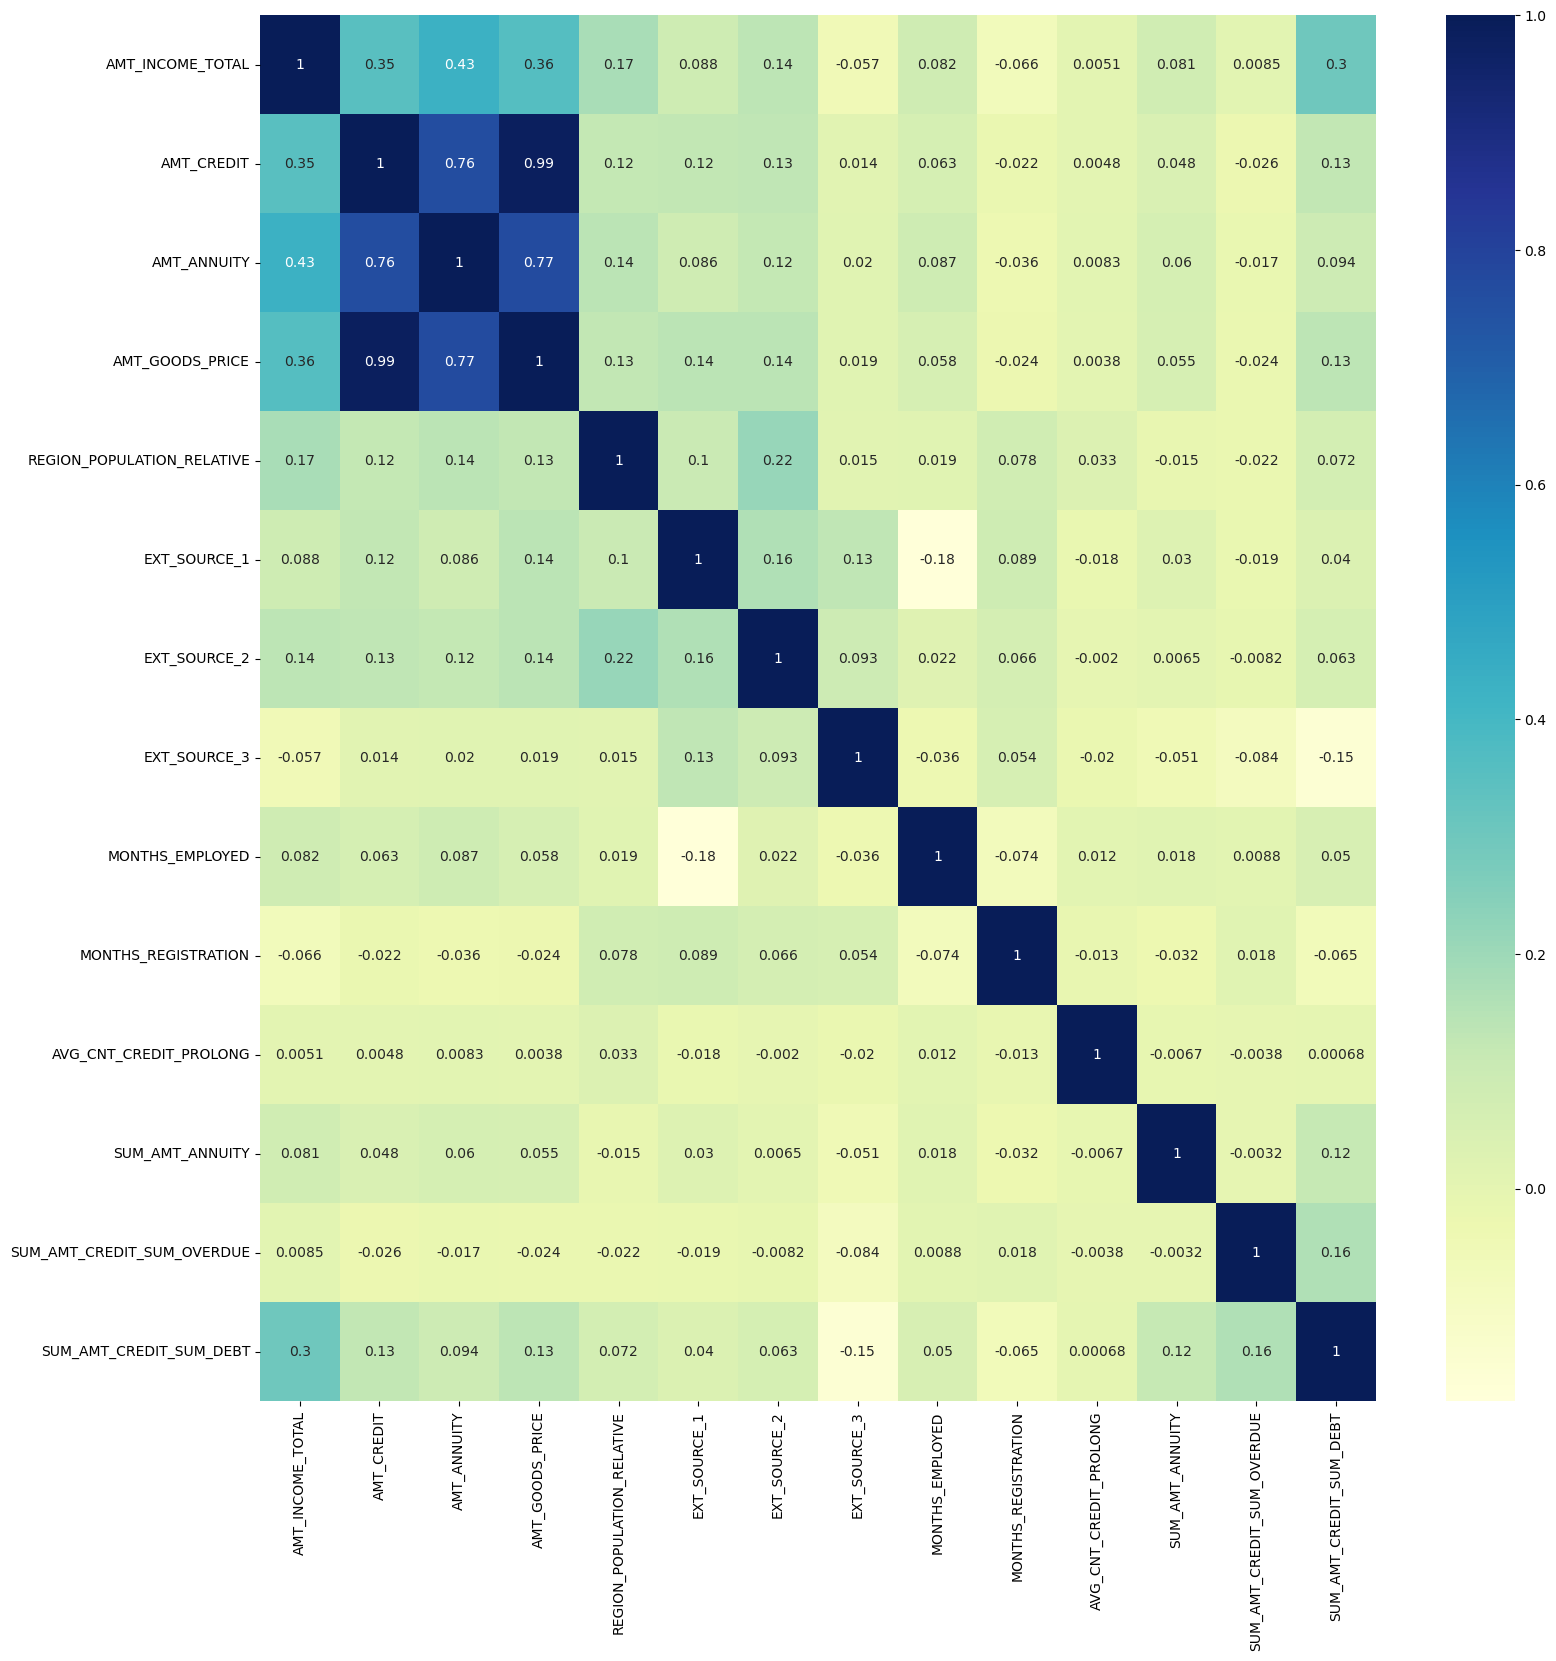

In [16]:
df_corr = df[columns_to_plot]
cor = df_corr.corr()
fig, ax = plt.subplots(figsize=(18,18))
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True,cmap="YlGnBu", ax=ax)

**Highly Correlated Variables:** 
- AMT_CREDIT & AMT_GOODS_PRICE = 0.99
- LIVE_CITY_NOT_WORK_CITY & REG_CITY_NOT_WORK_CITY = 0.83
- AMT_GOODS_PRICE & AMY_ANNUITY = 0.77
- AMT_CREDIT & AMT_ANNUITY = 0.76

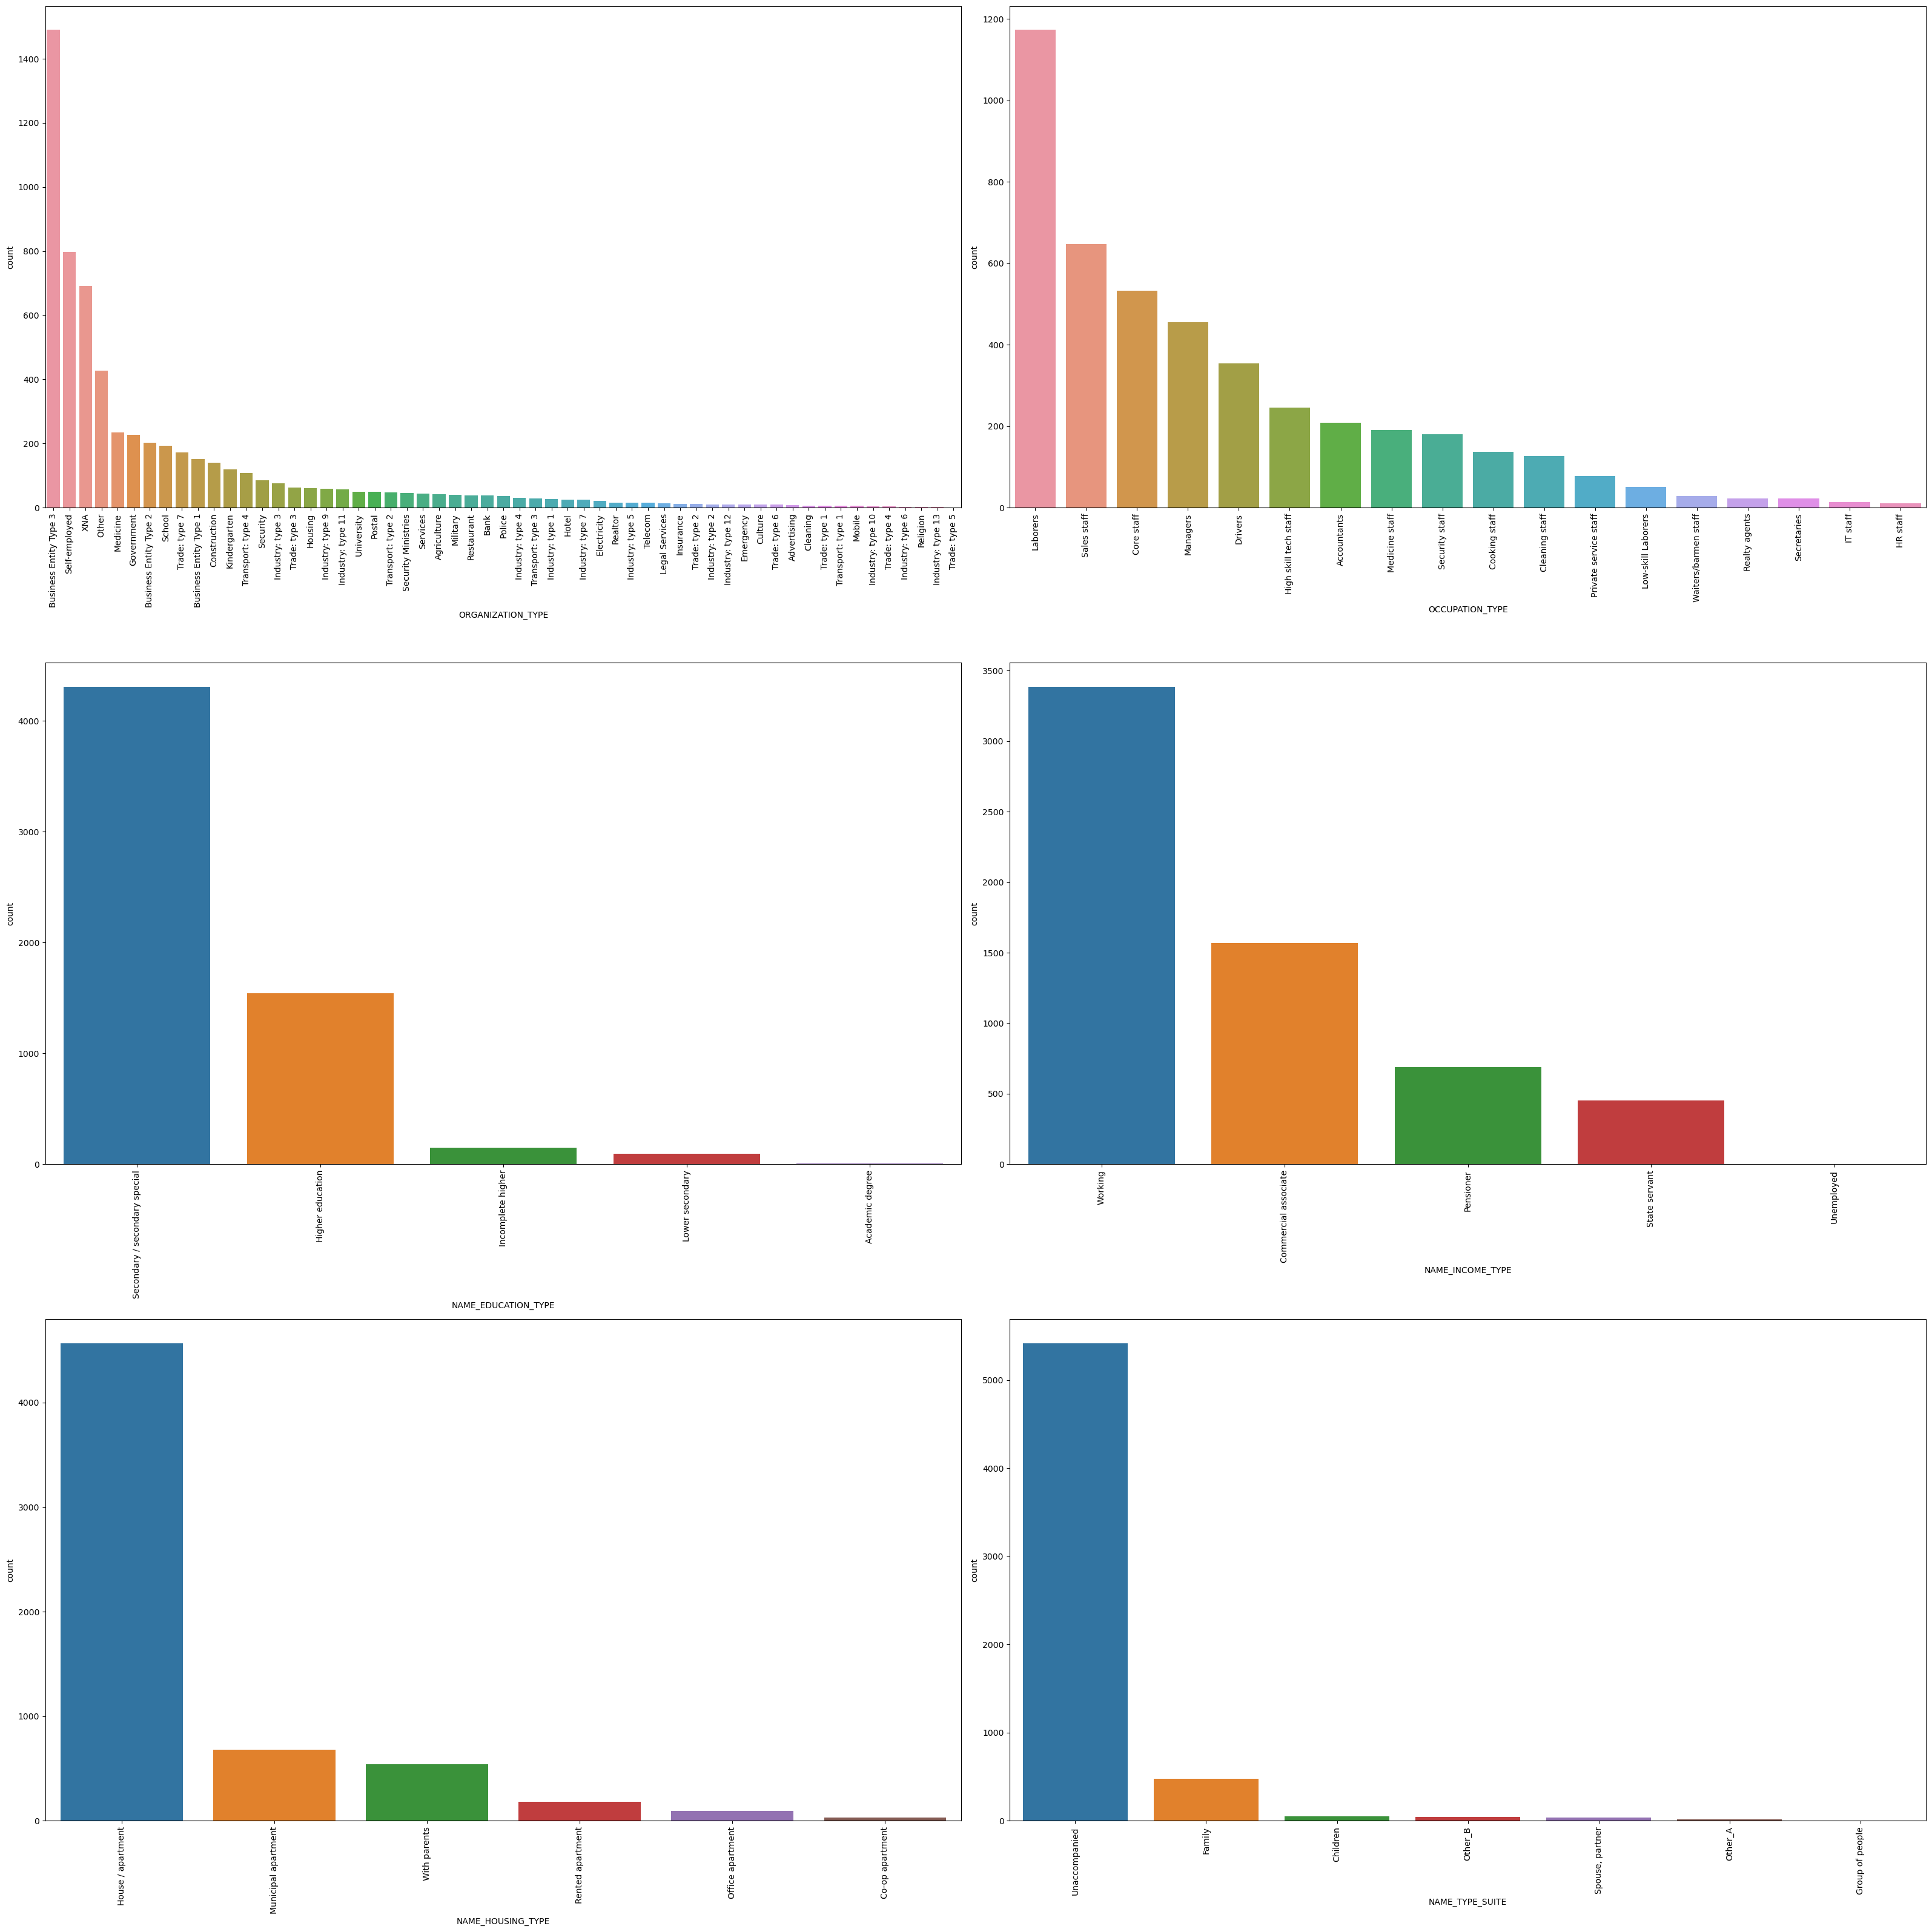

In [17]:
cat_var = df.select_dtypes(include=['object']).columns

# create the figure and subplots
row_count=int(np.ceil(len(cat_var)/2))
fig, axes = plt.subplots(ncols=2, nrows=row_count, figsize=(32, 32))

for i, axis in enumerate(fig.axes):
    # show in decending order if categoridal
    if df[cat_var[i]].dtype == 'O':
        sns.countplot(ax=axis, x = df[cat_var[i]], order=df[cat_var[i]].value_counts(ascending=False).index)
    else:
      sns.countplot(ax=axis, x = df[cat_var[i]])
    axis.set_xticklabels(axis.get_xticklabels(), rotation=90)
    axis.set_xlabel(str(cat_var[i]))
    if i == len(cat_var)-1: 
         break
    
# Show the plot
plt.tight_layout()
plt.show()



In [18]:
df['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    1490
Self-employed              797
XNA                        692
Other                      428
Medicine                   234
Government                 226
Business Entity Type 2     202
School                     193
Trade: type 7              172
Business Entity Type 1     151
Construction               139
Kindergarten               120
Transport: type 4          108
Security                    85
Industry: type 3            75
Trade: type 3               63
Housing                     60
Industry: type 9            58
Industry: type 11           57
University                  49
Postal                      49
Transport: type 2           47
Security Ministries         45
Services                    44
Agriculture                 42
Military                    39
Restaurant                  38
Bank                        37
Police                      36
Industry: type 4            30
Transport: type 3           29
Industry: type 1     

# Bivariate Analysis

Text(0.5, 1.0, 'Distribution of Continuous Variables by Default Rate')

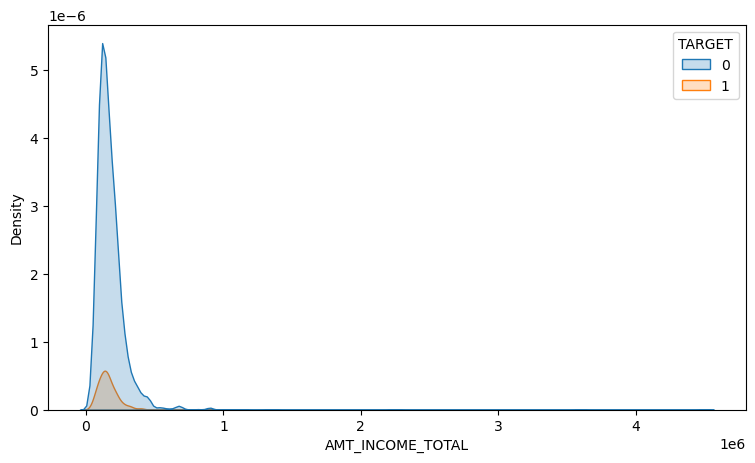

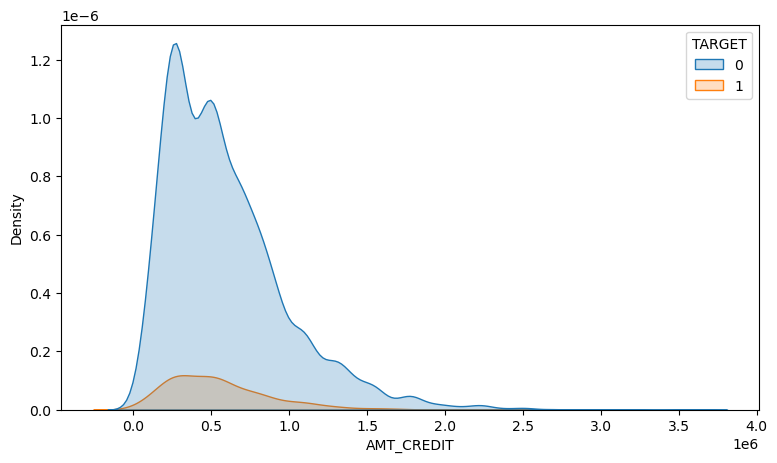

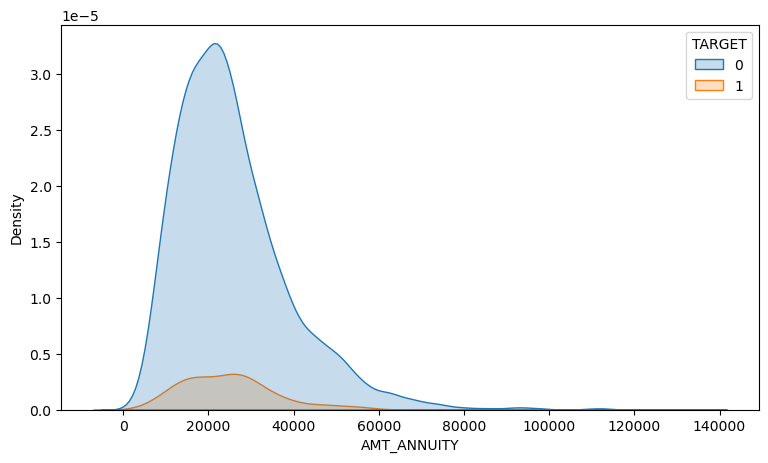

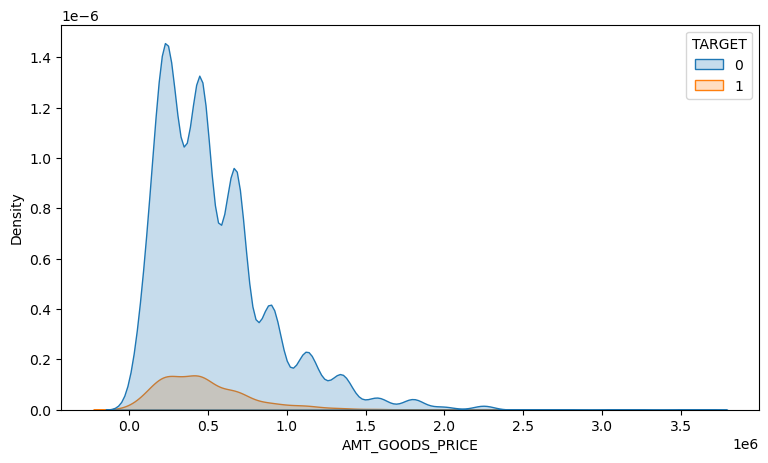

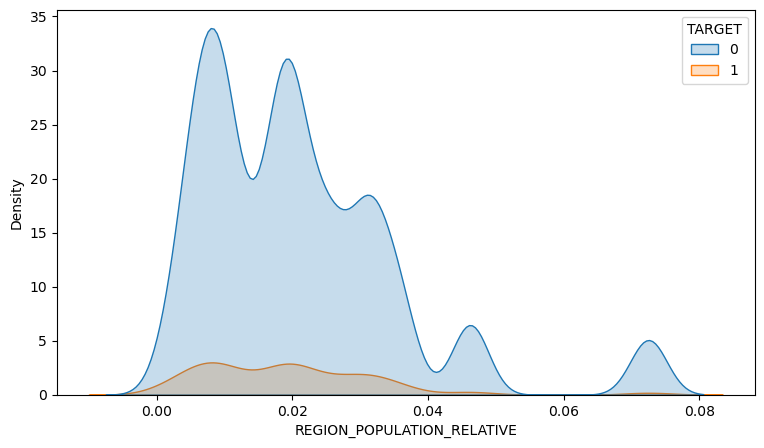

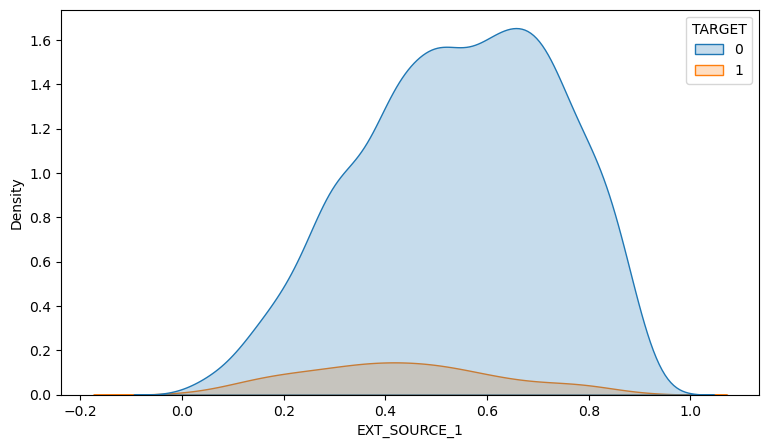

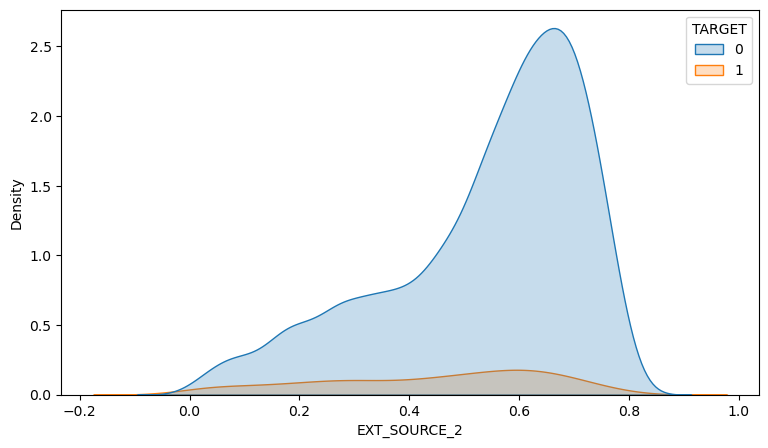

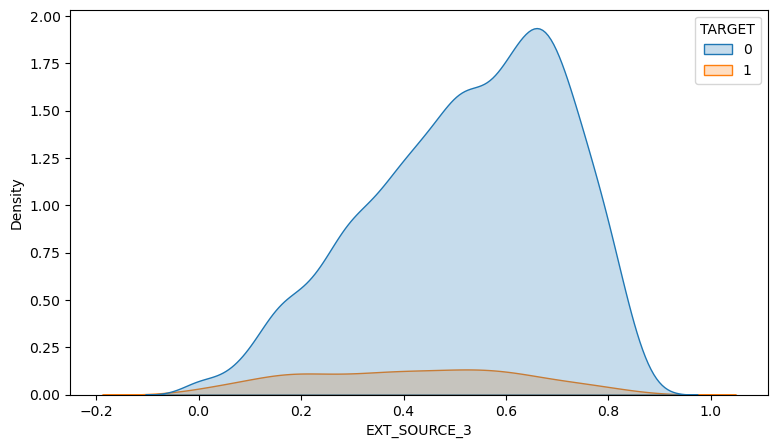

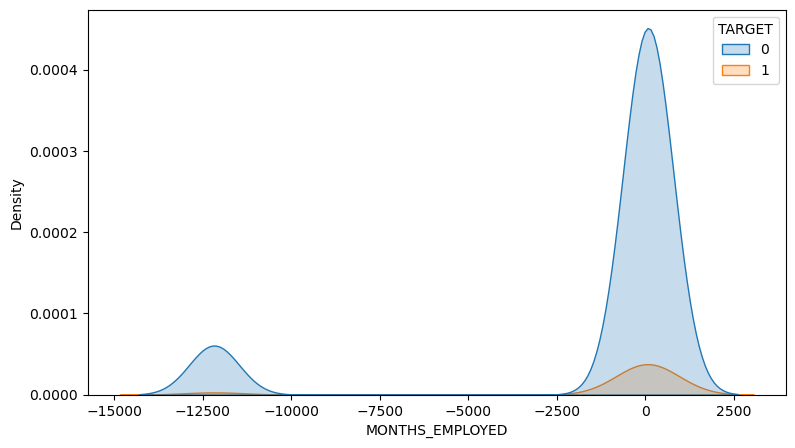

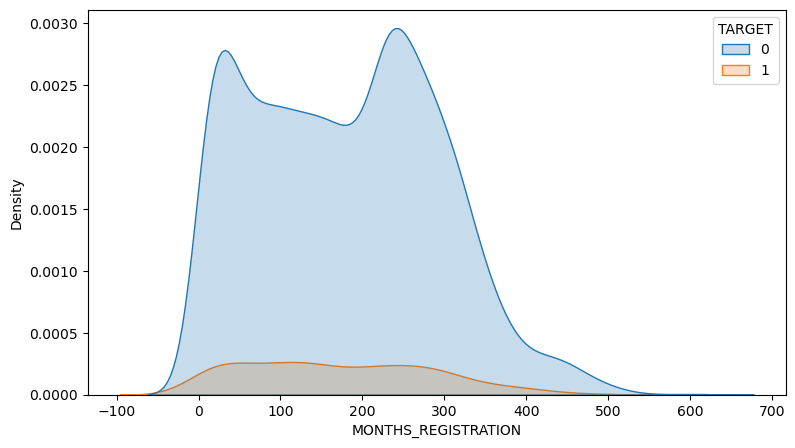

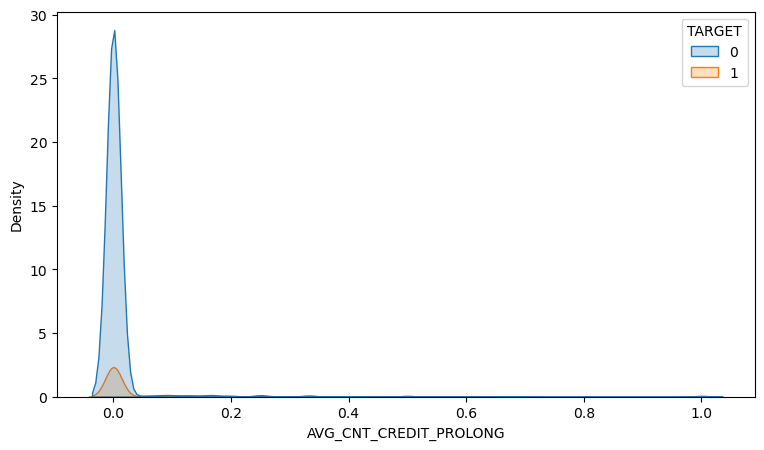

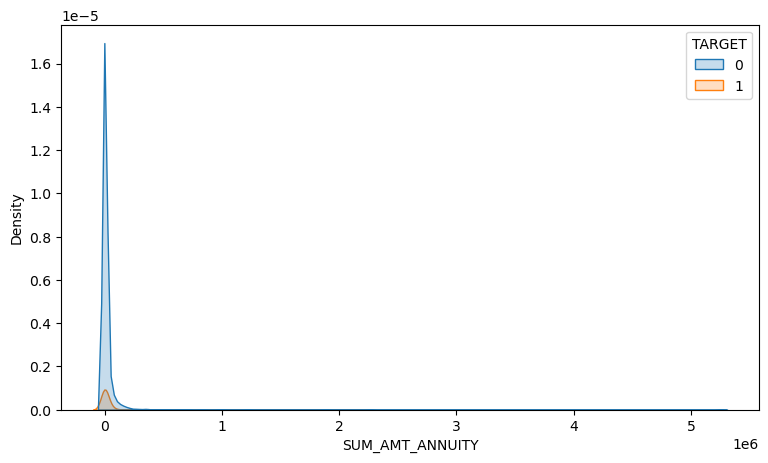

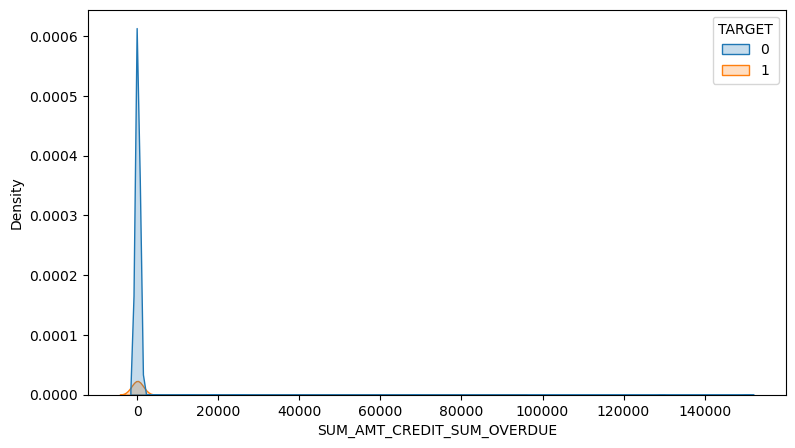

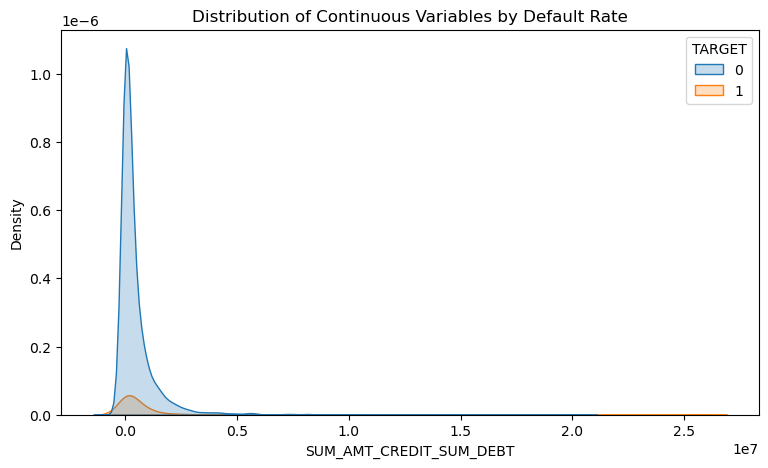

In [19]:
#KDE Plots for continuous variables

for i, var in enumerate(columns_to_plot):
    plt.figure(figsize=(9,5))
    sns.kdeplot(data=df, x=var, hue="TARGET", fill = True)
plt.title('Distribution of Continuous Variables by Default Rate')

<Figure size 640x480 with 0 Axes>

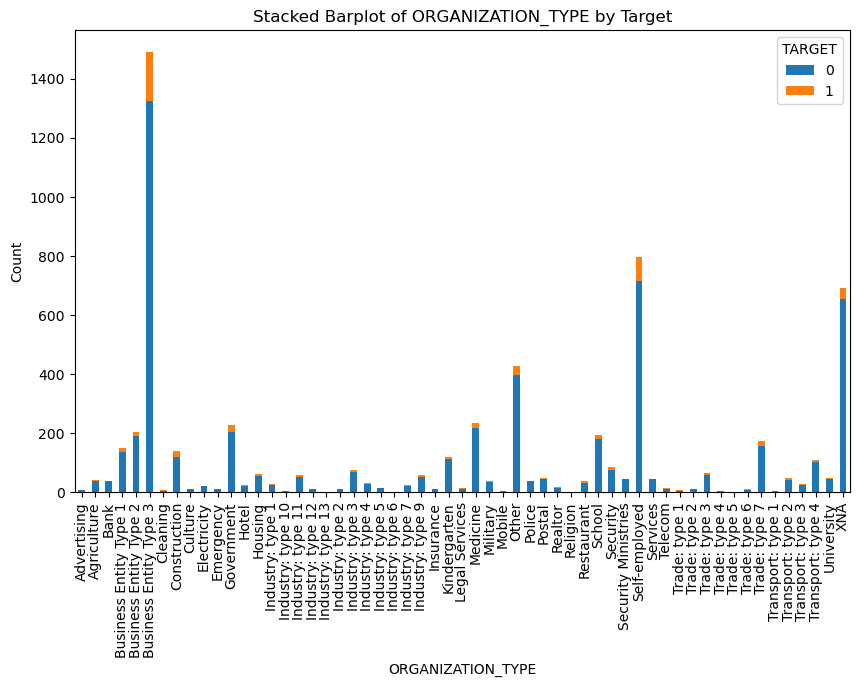

<Figure size 640x480 with 0 Axes>

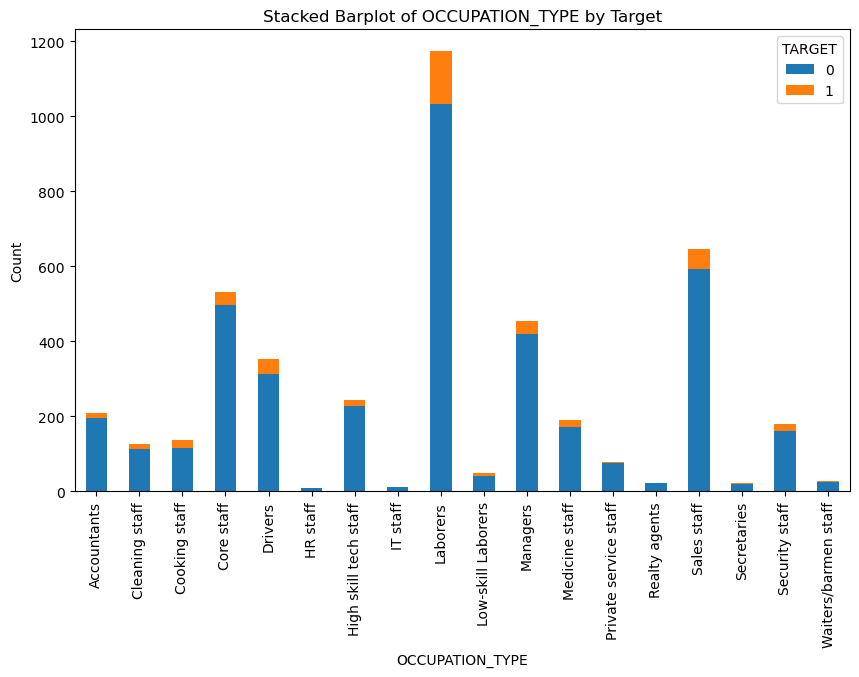

<Figure size 640x480 with 0 Axes>

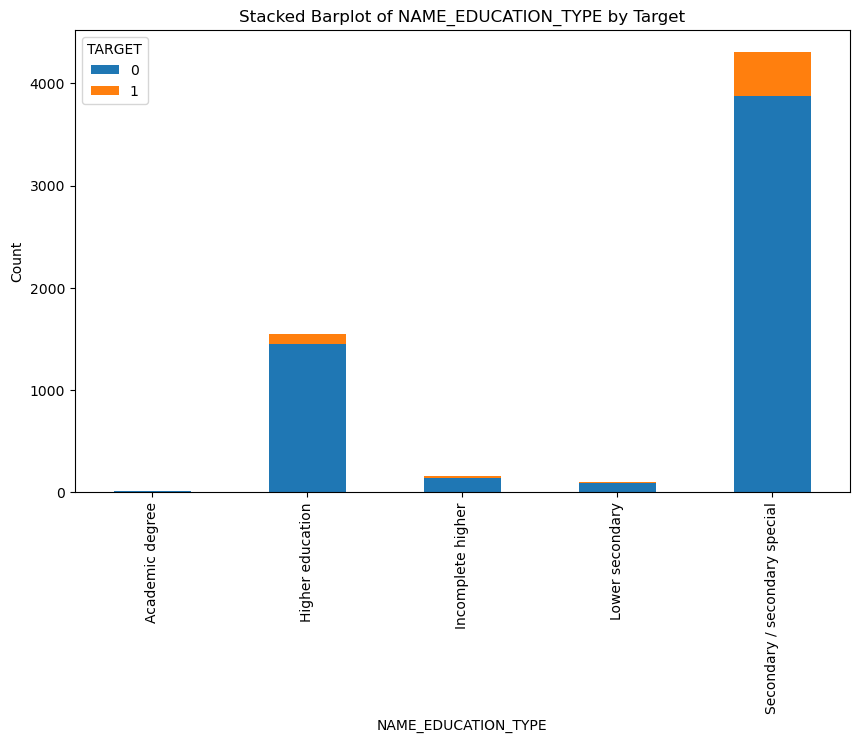

<Figure size 640x480 with 0 Axes>

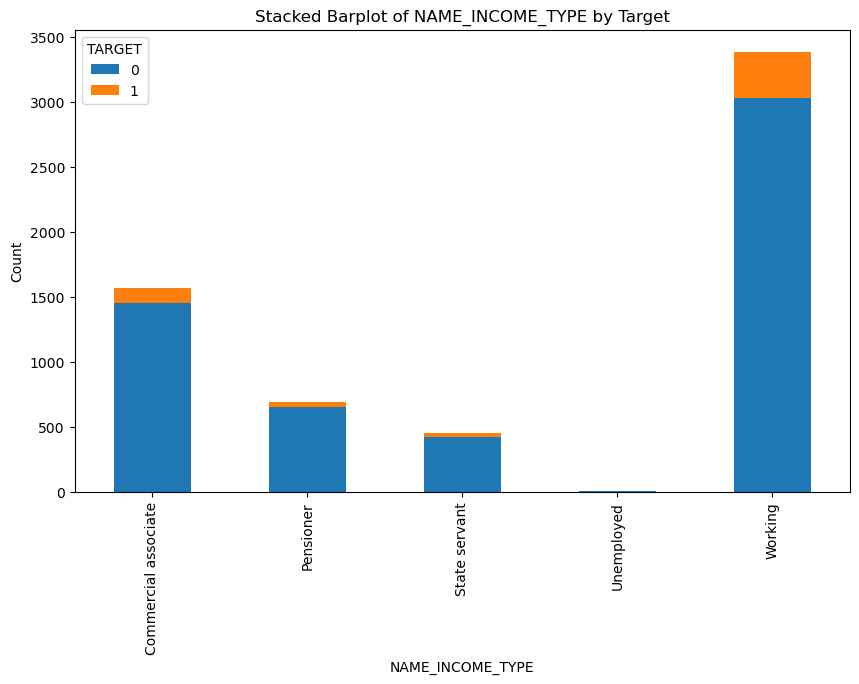

<Figure size 640x480 with 0 Axes>

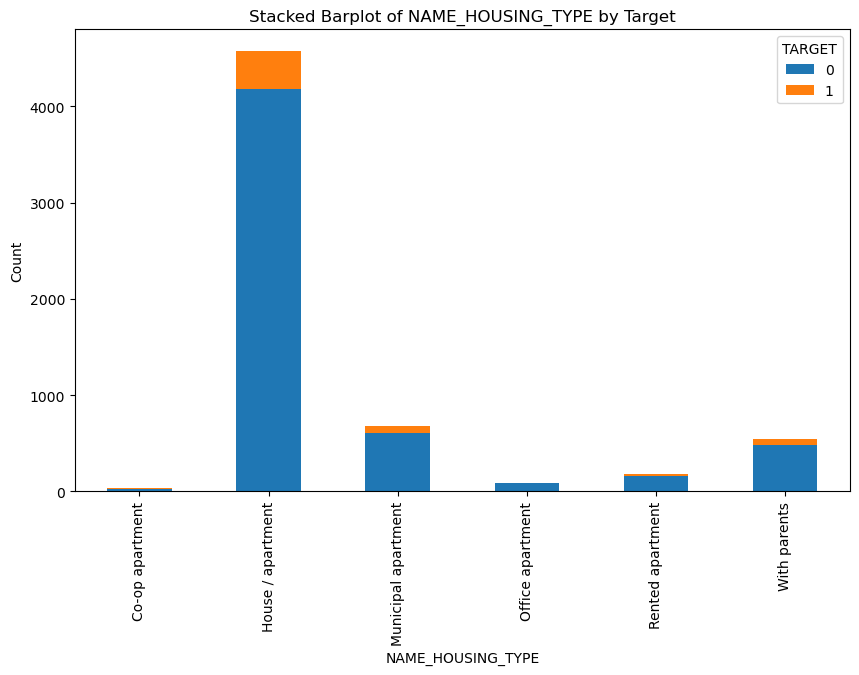

<Figure size 640x480 with 0 Axes>

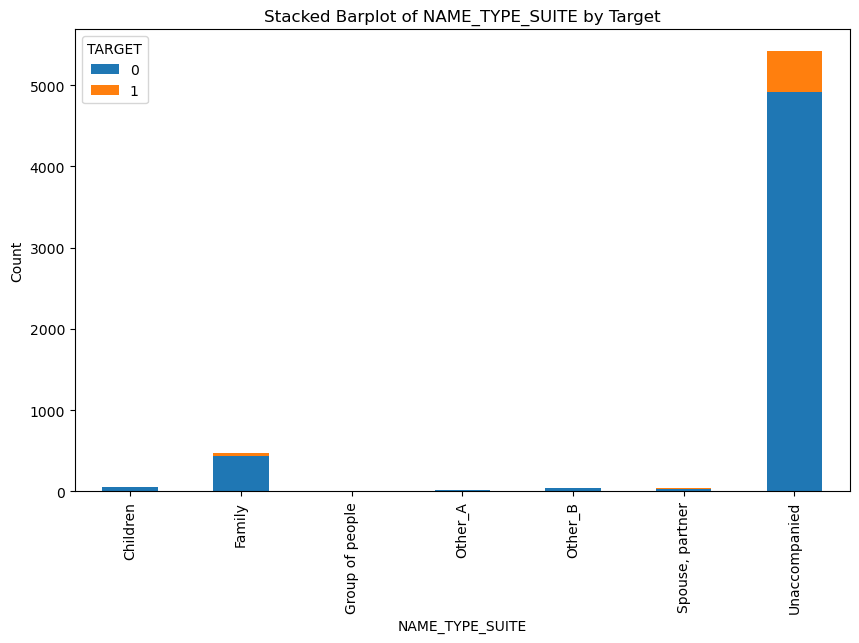

In [20]:
#Stacked barcharts for categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns

for column in df[categorical_columns]:
    plt.figure()
    
    # create a cross-tabulation to get counts
    crosstab = pd.crosstab(df[column], df['TARGET'])
    
    # create a stacked barplot
    crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
    
    plt.xticks(rotation=90)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Stacked Barplot of {column} by Target')
    
    plt.show()

# Data Preparation

In [21]:
df.isnull().sum()

TARGET                            0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       2
AMT_GOODS_PRICE                   5
REGION_POPULATION_RELATIVE        0
CNT_FAM_MEMBERS                   0
ORGANIZATION_TYPE                 0
EXT_SOURCE_1                   3381
EXT_SOURCE_2                     15
EXT_SOURCE_3                   1186
REG_CITY_NOT_LIVE_CITY            0
REG_CITY_NOT_WORK_CITY            0
LIVE_CITY_NOT_WORK_CITY           0
OCCUPATION_TYPE                1626
NAME_EDUCATION_TYPE               0
NAME_INCOME_TYPE                  0
REGION_RATING_CLIENT_W_CITY       0
NAME_HOUSING_TYPE                 0
NAME_TYPE_SUITE                  51
DEF_60_CNT_SOCIAL_CIRCLE         22
AGE                               0
MONTHS_EMPLOYED                   0
MONTHS_REGISTRATION               0
AVG_CNT_CREDIT_PROLONG          838
SUM_AMT_ANNUITY                 838
SUM_AMT_CREDIT_SUM_OVERDUE  

In [22]:
rows_w_gt_5_na = df[df.isnull().sum(axis=1) > 5].shape[0]
print('Percent of total rows missing more than 5 values: ' + str("{:.1%}".format(rows_w_gt_5_na/df.shape[0])))

Percent of total rows missing more than 5 values: 9.6%


As scorecardpy bins missing values on its own, don't have to remove missing rows

In [23]:
#Identify invalid observation
max_months_employed = -80*12
df[df['MONTHS_EMPLOYED']<max_months_employed]

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0          0             0           67500.0    298728.0      15381.0   
4          1             0          112500.0    417024.0      25330.5   
10         0             0          157500.0    117000.0      11700.0   
26         0             0          157500.0    288562.5      18918.0   
28         0             0          337500.0    585000.0      29250.0   
...      ...           ...               ...         ...          ...   
6040       1             0           57600.0    343377.0      16830.0   
6059       0             0          135000.0    239850.0      24705.0   
6085       0             0           85500.0    117000.0      11524.5   
6088       0             0          135000.0    497520.0      28692.0   
6090       0             0           90000.0    315000.0      15151.5   

      AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  CNT_FAM_MEMBERS  \
0            202500.0                    0.019101              1.0   
4            360000.0                    0.025164              1.0   
10           117000.0                    0.028663              1.0   
26           261000.0                    0.009630              1.0   
28           585000.0                    0.020713              1.0   
...               ...                         ...              ...   
6040         283500.0                    0.002134              1.0   
6059         225000.0                    0.035792              1.0   
6085         117000.0                    0.015221              1.0   
6088         450000.0                    0.010966              1.0   
6090         315000.0                    0.010006              1.0   

     ORGANIZATION_TYPE  EXT_SOURCE_1  ...    NAME_HOUSING_TYPE  \
0                  XNA           NaN  ...  Municipal apartment   
4                  XNA           NaN  ...    House / apartment   
10                 XNA           NaN  ...    House / apartment   
26                 XNA           NaN  ...    House / apartment   
28                 XNA           NaN  ...    House / apartment   
...                ...           ...  ...                  ...   
6040               XNA           NaN  ...    House / apartment   
6059               XNA      0.872055  ...    House / apartment   
6085               XNA           NaN  ...    House / apartment   
6088               XNA           NaN  ...    House / apartment   
6090               XNA           NaN  ...    House / apartment   

      NAME_TYPE_SUITE  DEF_60_CNT_SOCIAL_CIRCLE        AGE  MONTHS_EMPLOYED  \
0              Family                       0.0  59.235616    -12174.766667   
4              Family                       0.0  37.553425    -12174.766667   
10      Unaccompanied                       0.0  56.964384    -12174.766667   
26      Unaccompanied                       0.0  52.843836    -12174.766667   
28      Unaccompanied                       NaN  38.257534    -12174.766667   
...               ...                       ...        ...              ...   
6040    Unaccompanied                       0.0  56.531507    -12174.766667   
6059    Unaccompanied                       0.0  59.416438    -12174.766667   
6085    Unaccompanied                       0.0  53.238356    -12174.766667   
6088    Unaccompanied                       0.0  58.024658    -12174.766667   
6090    Unaccompanied                       0.0  58.372603    -12174.766667   

     MONTHS_REGISTRATION AVG_CNT_CREDIT_PROLONG SUM_AMT_ANNUITY  \
0              67.300000                    0.0          4653.0   
4             260.300000                    0.0         12163.5   
10            140.166667                    0.0             0.0   
26             90.400000                    NaN             NaN   
28              3.833333                    0.0             0.0   
...                  ...                    ...             ...   
6040          222.533333                    0.0             0.0   
6059      

580 rows with MONTHS_EMPLOYED > -12,000 which is >1,000 years, Likely to be a default figure for Missing Values

In [24]:
df.loc[df['MONTHS_EMPLOYED'] < -12000, 'MONTHS_EMPLOYED'] = np.nan
df.isnull().sum()

TARGET                            0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       2
AMT_GOODS_PRICE                   5
REGION_POPULATION_RELATIVE        0
CNT_FAM_MEMBERS                   0
ORGANIZATION_TYPE                 0
EXT_SOURCE_1                   3381
EXT_SOURCE_2                     15
EXT_SOURCE_3                   1186
REG_CITY_NOT_LIVE_CITY            0
REG_CITY_NOT_WORK_CITY            0
LIVE_CITY_NOT_WORK_CITY           0
OCCUPATION_TYPE                1626
NAME_EDUCATION_TYPE               0
NAME_INCOME_TYPE                  0
REGION_RATING_CLIENT_W_CITY       0
NAME_HOUSING_TYPE                 0
NAME_TYPE_SUITE                  51
DEF_60_CNT_SOCIAL_CIRCLE         22
AGE                               0
MONTHS_EMPLOYED                 692
MONTHS_REGISTRATION               0
AVG_CNT_CREDIT_PROLONG          838
SUM_AMT_ANNUITY                 838
SUM_AMT_CREDIT_SUM_OVERDUE  

In [25]:
#Remove highly correlated variables
#IV with REG_CITY_NOT_WORK_CITY & AMT_ANNUITY is higher
df.drop(['LIVE_CITY_NOT_WORK_CITY', 'AMT_GOODS_PRICE'], axis='columns', inplace = True)

# Credit Scorecard Process

## WOE and characteristic IV

In [26]:
# automatically calculate bin ranges 
bins = sc.woebin(df, y='TARGET', check_cate_num= False, no_cores=6)

# make it easy to read the bins
for variables , bindetails in bins.items():
    print(variables, " : ")
    display(bindetails)
    print("--"*50)

[INFO] creating woe binning ...
MONTHS_REGISTRATION  : 


variable            bin  count  count_distr  good  bad  \
0  MONTHS_REGISTRATION    [-inf,70.0)   1365     0.223697  1234  131   
1  MONTHS_REGISTRATION    [70.0,90.0)    323     0.052933   298   25   
2  MONTHS_REGISTRATION   [90.0,180.0)   1395     0.228614  1246  149   
3  MONTHS_REGISTRATION  [180.0,230.0)    778     0.127499   712   66   
4  MONTHS_REGISTRATION  [230.0,280.0)    993     0.162734   921   72   
5  MONTHS_REGISTRATION  [280.0,300.0)    317     0.051950   283   34   
6  MONTHS_REGISTRATION  [300.0,350.0)    546     0.089479   508   38   
7  MONTHS_REGISTRATION    [350.0,inf)    385     0.063094   348   37   

    badprob       woe    bin_iv  total_iv breaks  is_special_values  
0  0.095971  0.065186  0.000976  0.028697   70.0              False  
1  0.077399 -0.170213  0.001430  0.028697   90.0              False  
2  0.106810  0.184258  0.008370  0.028697  180.0              False  
3  0.084833 -0.070418  0.000614  0.028697  230.0              False  
4  0.072508 -0.240789  0.008551  0.028697  280.0              False  
5  0.107256  0.188919  0.002003  0.028697  300.0              False  
6  0.069597 -0.284890  0.006464  0.028697  350.0              False  
7  0.096104  0.066721  0.000289  0.028697    inf              False

----------------------------------------------------------------------------------------------------
NAME_TYPE_SUITE  : 


variable                                           bin  count  \
0  NAME_TYPE_SUITE                                       missing     51   
1  NAME_TYPE_SUITE  Group of people%,%Other_A%,%Other_B%,%Family    543   
2  NAME_TYPE_SUITE    Spouse, partner%,%Children%,%Unaccompanied   5508   

   count_distr  good  bad   badprob       woe    bin_iv  total_iv  \
0     0.008358    50    1  0.019608 -1.604018  0.011545  0.020044   
1     0.088987   506   37  0.068140 -0.307614  0.007426  0.020044   
2     0.902655  4994  514  0.093319  0.034236  0.001073  0.020044   

                                         breaks  is_special_values  
0                                       missing               True  
1  Group of people%,%Other_A%,%Other_B%,%Family              False  
2    Spouse, partner%,%Children%,%Unaccompanied              False

----------------------------------------------------------------------------------------------------
EXT_SOURCE_1  : 


variable          bin  count  count_distr  good  bad   badprob  \
0  EXT_SOURCE_1      missing   3381     0.554081  3038  343  0.101449   
1  EXT_SOURCE_1  [-inf,0.38)    614     0.100623   526   88  0.143322   
2  EXT_SOURCE_1  [0.38,0.54)    725     0.118814   660   65  0.089655   
3  EXT_SOURCE_1  [0.54,0.62)    355     0.058178   334   21  0.059155   
4  EXT_SOURCE_1   [0.62,inf)   1027     0.168305   992   35  0.034080   

        woe    bin_iv  total_iv   breaks  is_special_values  
0  0.126781  0.009380   0.17269  missing               True  
1  0.520041  0.033618   0.17269     0.38              False  
2 -0.009847  0.000011   0.17269     0.54              False  
3 -0.458613  0.010152   0.17269     0.62              False  
4 -1.036370  0.119528   0.17269      inf              False

----------------------------------------------------------------------------------------------------
AMT_CREDIT  : 


variable                   bin  count  count_distr  good  bad   badprob  \
0  AMT_CREDIT       [-inf,250000.0)   1058     0.173386   970   88  0.083176   
1  AMT_CREDIT   [250000.0,350000.0)    969     0.158800   875   94  0.097007   
2  AMT_CREDIT   [350000.0,450000.0)    409     0.067027   360   49  0.119804   
3  AMT_CREDIT   [450000.0,500000.0)    554     0.090790   509   45  0.081227   
4  AMT_CREDIT   [500000.0,600000.0)    733     0.120125   646   87  0.118690   
5  AMT_CREDIT  [600000.0,1150000.0)   1877     0.307604  1718  159  0.084710   
6  AMT_CREDIT       [1150000.0,inf)    502     0.082268   472   30  0.059761   

        woe    bin_iv  total_iv     breaks  is_special_values  
0 -0.091954  0.001412  0.038871   250000.0              False  
1  0.077076  0.000974  0.038871   350000.0              False  
2  0.313721  0.007499  0.038871   450000.0              False  
3 -0.117780  0.001200  0.038871   500000.0              False  
4  0.303114  0.012492  0.038871   600000.0              False  
5 -0.072007  0.001549  0.038871  1150000.0              False  
6 -0.447776  0.013745  0.038871        inf              False

----------------------------------------------------------------------------------------------------
REG_CITY_NOT_WORK_CITY  : 


variable         bin  count  count_distr  good  bad  \
0  REG_CITY_NOT_WORK_CITY  [-inf,1.0)   4696     0.769584  4300  396   
1  REG_CITY_NOT_WORK_CITY   [1.0,inf)   1406     0.230416  1250  156   

    badprob       woe    bin_iv  total_iv breaks  is_special_values  
0  0.084327 -0.076951  0.004416   0.01744    1.0              False  
1  0.110953  0.226962  0.013024   0.01744    inf              False

----------------------------------------------------------------------------------------------------
SUM_AMT_CREDIT_SUM_DEBT  : 


variable                   bin  count  count_distr  good  \
0  SUM_AMT_CREDIT_SUM_DEBT               missing    838     0.137332   736   
1  SUM_AMT_CREDIT_SUM_DEBT       [-inf,100000.0)   2436     0.399213  2265   
2  SUM_AMT_CREDIT_SUM_DEBT   [100000.0,200000.0)    505     0.082760   447   
3  SUM_AMT_CREDIT_SUM_DEBT   [200000.0,300000.0)    388     0.063586   358   
4  SUM_AMT_CREDIT_SUM_DEBT   [300000.0,650000.0)    791     0.129630   716   
5  SUM_AMT_CREDIT_SUM_DEBT  [650000.0,1250000.0)    587     0.096198   516   
6  SUM_AMT_CREDIT_SUM_DEBT       [1250000.0,inf)    557     0.091282   512   

   bad   badprob       woe    bin_iv  total_iv     breaks  is_special_values  
0  102  0.121718  0.331748  0.017307  0.065928    missing               True  
1  171  0.070197 -0.275661  0.027105  0.065928   100000.0              False  
2   58  0.114851  0.265890  0.006523  0.065928   200000.0              False  
3   30  0.077320 -0.171330  0.001740  0.065928   300000.0              False  
4   75  0.094817  0.051813  0.000355  0.065928   650000.0              False  
5   71  0.120954  0.324578  0.011571  0.065928  1250000.0              False  
6   45  0.080790 -0.123657  0.001327  0.065928        inf              False

----------------------------------------------------------------------------------------------------
CNT_FAM_MEMBERS  : 


variable         bin  count  count_distr  good  bad   badprob  \
0  CNT_FAM_MEMBERS  [-inf,2.0)   4993     0.818256  4539  454  0.090927   
1  CNT_FAM_MEMBERS   [2.0,inf)   1109     0.181744  1011   98  0.088368   

        woe    bin_iv  total_iv breaks  is_special_values  
0  0.005640  0.000026  0.000145    2.0              False  
1 -0.025723  0.000119  0.000145    inf              False

----------------------------------------------------------------------------------------------------
REG_CITY_NOT_LIVE_CITY  : 


variable         bin  count  count_distr  good  bad  \
0  REG_CITY_NOT_LIVE_CITY  [-inf,1.0)   5650     0.925926  5154  496   
1  REG_CITY_NOT_LIVE_CITY   [1.0,inf)    452     0.074074   396   56   

    badprob       woe    bin_iv  total_iv breaks  is_special_values  
0  0.087788 -0.032947  0.000992  0.011584    1.0              False  
1  0.123894  0.351943  0.010593  0.011584    inf              False

----------------------------------------------------------------------------------------------------
EXT_SOURCE_3  : 


variable          bin  count  count_distr  good  bad   badprob  \
0  EXT_SOURCE_3      missing   1186     0.194363  1053  133  0.112142   
1  EXT_SOURCE_3  [-inf,0.22)    438     0.071780   337  101  0.230594   
2  EXT_SOURCE_3   [0.22,0.4)    951     0.155851   850  101  0.106204   
3  EXT_SOURCE_3    [0.4,0.6)   1624     0.266142  1492  132  0.081281   
4  EXT_SOURCE_3    [0.6,inf)   1903     0.311865  1818   85  0.044666   

        woe    bin_iv  total_iv   breaks  is_special_values  
0  0.238956  0.012237  0.286892  missing               True  
1  1.103043  0.134847  0.286892     0.22              False  
2  0.177889  0.005304  0.286892      0.4              False  
3 -0.117066  0.003477  0.286892      0.6              False  
4 -0.754836  0.131026  0.286892      inf              False

----------------------------------------------------------------------------------------------------
SUM_AMT_ANNUITY  : 


variable                bin  count  count_distr  good  bad  \
0  SUM_AMT_ANNUITY            missing    838     0.137332   736  102   
1  SUM_AMT_ANNUITY      [-inf,5000.0)   4246     0.695837  3895  351   
2  SUM_AMT_ANNUITY   [5000.0,20000.0)    309     0.050639   275   34   
3  SUM_AMT_ANNUITY  [20000.0,60000.0)    367     0.060144   329   38   
4  SUM_AMT_ANNUITY      [60000.0,inf)    342     0.056047   315   27   

    badprob       woe    bin_iv  total_iv   breaks  is_special_values  
0  0.121718  0.331748  0.017307  0.029029  missing               True  
1  0.082666 -0.098658  0.006505  0.029029   5000.0              False  
2  0.110032  0.217595  0.002621  0.029029  20000.0              False  
3  0.103542  0.149534  0.001430  0.029029  60000.0              False  
4  0.078947 -0.148731  0.001167  0.029029      inf              False

----------------------------------------------------------------------------------------------------
REGION_POPULATION_RELATIVE  : 


variable                           bin  count  \
0  REGION_POPULATION_RELATIVE                  [-inf,0.005)    462   
1  REGION_POPULATION_RELATIVE                 [0.005,0.027)   4014   
2  REGION_POPULATION_RELATIVE  [0.027,0.036000000000000004)   1129   
3  REGION_POPULATION_RELATIVE    [0.036000000000000004,inf)    497   

   count_distr  good  bad   badprob       woe    bin_iv  total_iv  \
0     0.075713   410   52  0.112554  0.243092  0.004942  0.036431   
1     0.657817  3653  361  0.089935 -0.006421  0.000027  0.036431   
2     0.185021  1014  115  0.101860  0.131279  0.003365  0.036431   
3     0.081449   473   24  0.048290 -0.673036  0.028097  0.036431   

                 breaks  is_special_values  
0                 0.005              False  
1                 0.027              False  
2  0.036000000000000004              False  
3                   inf              False

----------------------------------------------------------------------------------------------------
NAME_INCOME_TYPE  : 


variable                     bin  count  count_distr  good  bad  \
0  NAME_INCOME_TYPE  Unemployed%,%Pensioner    692     0.113405   653   39   
1  NAME_INCOME_TYPE           State servant    453     0.074238   421   32   
2  NAME_INCOME_TYPE    Commercial associate   1570     0.257293  1448  122   
3  NAME_INCOME_TYPE                 Working   3387     0.555064  3028  359   

    badprob       woe    bin_iv  total_iv                  breaks  \
0  0.056358 -0.510010  0.023973  0.053806  Unemployed%,%Pensioner   
1  0.070640 -0.268892  0.004809  0.053806           State servant   
2  0.077707 -0.165912  0.006618  0.053806    Commercial associate   
3  0.105994  0.175670  0.018406  0.053806                 Working   

   is_special_values  
0              False  
1              False  
2              False  
3              False

----------------------------------------------------------------------------------------------------
DEF_60_CNT_SOCIAL_CIRCLE  : 


variable         bin  count  count_distr  good  bad  \
0  DEF_60_CNT_SOCIAL_CIRCLE     missing     22     0.003605    22    0   
1  DEF_60_CNT_SOCIAL_CIRCLE  [-inf,1.0)   5642     0.924615  5141  501   
2  DEF_60_CNT_SOCIAL_CIRCLE   [1.0,inf)    438     0.071780   387   51   

    badprob       woe    bin_iv  total_iv   breaks  is_special_values  
0  0.000000 -0.890027  0.002079  0.008822  missing               True  
1  0.088798 -0.022021  0.000444  0.008822      1.0              False  
2  0.116438  0.279777  0.006298  0.008822      inf              False

----------------------------------------------------------------------------------------------------
MONTHS_EMPLOYED  : 


variable           bin  count  count_distr  good  bad   badprob  \
0  MONTHS_EMPLOYED       missing    692     0.113405   653   39  0.056358   
1  MONTHS_EMPLOYED   [-inf,70.0)   2942     0.482137  2608  334  0.113528   
2  MONTHS_EMPLOYED  [70.0,220.0)   2027     0.332186  1873  154  0.075974   
3  MONTHS_EMPLOYED   [220.0,inf)    441     0.072271   416   25  0.056689   

        woe    bin_iv  total_iv   breaks  is_special_values  
0 -0.510010  0.023973  0.084222  missing               True  
1  0.252807  0.034170  0.084222     70.0              False  
2 -0.190339  0.011133  0.084222    220.0              False  
3 -0.503804  0.014945  0.084222      inf              False

----------------------------------------------------------------------------------------------------
EXT_SOURCE_2  : 


variable                        bin  count  count_distr  good  bad  \
0  EXT_SOURCE_2                    missing     15     0.002458    13    2   
1  EXT_SOURCE_2                [-inf,0.18)    397     0.065061   314   83   
2  EXT_SOURCE_2                [0.18,0.52)   1884     0.308751  1654  230   
3  EXT_SOURCE_2                [0.52,0.64)   1718     0.281547  1582  136   
4  EXT_SOURCE_2  [0.64,0.7000000000000001)   1058     0.173386   997   61   
5  EXT_SOURCE_2   [0.7000000000000001,inf)   1030     0.168797   990   40   

    badprob       woe    bin_iv  total_iv              breaks  \
0  0.133333  0.436203  0.000559   0.26663             missing   
1  0.209068  0.977453  0.091671   0.26663                0.18   
2  0.122081  0.335133  0.039763   0.26663                0.52   
3  0.079162 -0.145785  0.005637   0.26663                0.64   
4  0.057656 -0.485872  0.033589   0.26663  0.7000000000000001   
5  0.038835 -0.900820  0.095410   0.26663                 inf   

   is_special_values  
0               True  
1              False  
2              False  
3              False  
4              False  
5              False

----------------------------------------------------------------------------------------------------
NAME_EDUCATION_TYPE  : 


variable                                                bin  \
0  NAME_EDUCATION_TYPE                 Academic degree%,%Higher education   
1  NAME_EDUCATION_TYPE  Lower secondary%,%Incomplete higher%,%Secondar...   

   count  count_distr  good  bad   badprob       woe    bin_iv  total_iv  \
0   1549     0.253851  1452   97  0.062621 -0.397981  0.034185  0.043638   
1   4553     0.746149  4098  455  0.099934  0.110048  0.009453  0.043638   

                                              breaks  is_special_values  
0                 Academic degree%,%Higher education              False  
1  Lower secondary%,%Incomplete higher%,%Secondar...              False

----------------------------------------------------------------------------------------------------
REGION_RATING_CLIENT_W_CITY  : 


variable         bin  count  count_distr  good  bad  \
0  REGION_RATING_CLIENT_W_CITY  [-inf,2.0)    853      0.13979   802   51   
1  REGION_RATING_CLIENT_W_CITY   [2.0,3.0)   4463      0.73140  4071  392   
2  REGION_RATING_CLIENT_W_CITY   [3.0,inf)    786      0.12881   677  109   

    badprob       woe    bin_iv  total_iv breaks  is_special_values  
0  0.059789 -0.447278  0.023309  0.060424    2.0              False  
1  0.087833 -0.032377  0.000757  0.060424    3.0              False  
2  0.138677  0.481682  0.036358  0.060424    inf              False

----------------------------------------------------------------------------------------------------
AGE  : 


variable          bin  count  count_distr  good  bad   badprob       woe  \
0      AGE  [-inf,37.0)    807     0.132252   735   72  0.089219 -0.015199   
1      AGE  [37.0,48.5)   3183     0.521632  2858  325  0.102105  0.133953   
2      AGE  [48.5,55.0)   1235     0.202393  1131  104  0.084211 -0.078461   
3      AGE   [55.0,inf)    877     0.143723   826   51  0.058153 -0.476764   

     bin_iv  total_iv breaks  is_special_values  
0  0.000030  0.038032   37.0              False  
1  0.009887  0.038032   48.5              False  
2  0.001207  0.038032   55.0              False  
3  0.026907  0.038032    inf              False

----------------------------------------------------------------------------------------------------
AVG_CNT_CREDIT_PROLONG  : 


variable         bin  count  count_distr  good  bad  \
0  AVG_CNT_CREDIT_PROLONG     missing    838     0.137332   736  102   
1  AVG_CNT_CREDIT_PROLONG  [-inf,inf)   5264     0.862668  4814  450   

    badprob       woe    bin_iv  total_iv   breaks  is_special_values  
0  0.121718  0.331748  0.017307  0.020543  missing               True  
1  0.085486 -0.062031  0.003236  0.020543      inf              False

----------------------------------------------------------------------------------------------------
AMT_INCOME_TOTAL  : 


variable                  bin  count  count_distr  good  bad  \
0  AMT_INCOME_TOTAL       [-inf,70000.0)    348     0.057030   307   41   
1  AMT_INCOME_TOTAL   [70000.0,150000.0)   2647     0.433792  2411  236   
2  AMT_INCOME_TOTAL  [150000.0,160000.0)    527     0.086365   458   69   
3  AMT_INCOME_TOTAL  [160000.0,210000.0)   1104     0.180924  1001  103   
4  AMT_INCOME_TOTAL  [210000.0,330000.0)   1148     0.188135  1063   85   
5  AMT_INCOME_TOTAL       [330000.0,inf)    328     0.053753   310   18   

    badprob       woe    bin_iv  total_iv    breaks  is_special_values  
0  0.117816  0.294729  0.005588  0.044252   70000.0              False  
1  0.089158 -0.015960  0.000110  0.044252  150000.0              False  
2  0.130930  0.415242  0.017638  0.044252  160000.0              False  
3  0.093297  0.033979  0.000212  0.044252  210000.0              False  
4  0.074042 -0.218194  0.008192  0.044252  330000.0              False  
5  0.054878 -0.538195  0.012512  0.044252       inf              False

----------------------------------------------------------------------------------------------------
CNT_CHILDREN  : 


variable         bin  count  count_distr  good  bad   badprob  \
0  CNT_CHILDREN  [-inf,1.0)   4993     0.818256  4539  454  0.090927   
1  CNT_CHILDREN   [1.0,inf)   1109     0.181744  1011   98  0.088368   

        woe    bin_iv  total_iv breaks  is_special_values  
0  0.005640  0.000026  0.000145    1.0              False  
1 -0.025723  0.000119  0.000145    inf              False

----------------------------------------------------------------------------------------------------
SUM_AMT_CREDIT_SUM_OVERDUE  : 


variable         bin  count  count_distr  good  bad  \
0  SUM_AMT_CREDIT_SUM_OVERDUE     missing    838     0.137332   736  102   
1  SUM_AMT_CREDIT_SUM_OVERDUE  [-inf,inf)   5264     0.862668  4814  450   

    badprob       woe    bin_iv  total_iv   breaks  is_special_values  
0  0.121718  0.331748  0.017307  0.020543  missing               True  
1  0.085486 -0.062031  0.003236  0.020543      inf              False

----------------------------------------------------------------------------------------------------
NAME_HOUSING_TYPE  : 


variable                                                bin  \
0  NAME_HOUSING_TYPE  Office apartment%,%House / apartment%,%Co-op a...   
1  NAME_HOUSING_TYPE                                Municipal apartment   
2  NAME_HOUSING_TYPE                    With parents%,%Rented apartment   

   count  count_distr  good  bad   badprob       woe    bin_iv  total_iv  \
0   4693     0.769092  4295  398  0.084807 -0.070750  0.003740  0.016435   
1    681     0.111603   612   69  0.101322  0.125379  0.001847  0.016435   
2    728     0.119305   643   85  0.116758  0.284512  0.010848  0.016435   

                                              breaks  is_special_values  
0  Office apartment%,%House / apartment%,%Co-op a...              False  
1                                Municipal apartment              False  
2                    With parents%,%Rented apartment              False

----------------------------------------------------------------------------------------------------
AMT_ANNUITY  : 


variable                bin  count  count_distr  good  bad   badprob  \
0  AMT_ANNUITY            missing      2     0.000328     2    0  0.000000   
1  AMT_ANNUITY     [-inf,10000.0)    414     0.067847   383   31  0.074879   
2  AMT_ANNUITY  [10000.0,18000.0)   1510     0.247460  1367  143  0.094702   
3  AMT_ANNUITY  [18000.0,24000.0)   1309     0.214520  1215   94  0.071811   
4  AMT_ANNUITY  [24000.0,32000.0)   1376     0.225500  1211  165  0.119913   
5  AMT_ANNUITY  [32000.0,42000.0)    818     0.134054   742   76  0.092910   
6  AMT_ANNUITY      [42000.0,inf)    673     0.110292   630   43  0.063893   

        woe    bin_iv  total_iv   breaks  is_special_values  
0  1.507868  0.001911  0.056307  missing               True  
1 -0.207672  0.002687  0.056307  10000.0              False  
2  0.048847  0.000602  0.056307  18000.0              False  
3 -0.252829  0.012365  0.056307  24000.0              False  
4  0.313120  0.025121  0.056307  32000.0              False  
5  0.027760  0.000104  0.056307  42000.0              False  
6 -0.378144  0.013516  0.056307      inf              False

----------------------------------------------------------------------------------------------------
OCCUPATION_TYPE  : 


variable                                                bin  count  \
0  OCCUPATION_TYPE                                            missing   1626   
1  OCCUPATION_TYPE  HR staff%,%IT staff%,%Private service staff%,%...    333   
2  OCCUPATION_TYPE  Core staff%,%High skill tech staff%,%Managers%...   1880   
3  OCCUPATION_TYPE  Medicine staff%,%Waiters/barmen staff%,%Cleani...    880   
4  OCCUPATION_TYPE  Laborers%,%Secretaries%,%Cooking staff%,%Low-s...   1383   

   count_distr  good  bad   badprob       woe    bin_iv  total_iv  \
0     0.266470  1505  121  0.074416 -0.212752  0.011056  0.085808   
1     0.054572   318   15  0.045045 -0.745996  0.022472  0.085808   
2     0.308096  1735  145  0.077128 -0.174024  0.008689  0.085808   
3     0.144215   783   97  0.110227  0.219583  0.007607  0.085808   
4     0.226647  1209  174  0.125813  0.369512  0.035983  0.085808   

                                              breaks  is_special_values  
0                                            missing               True  
1  HR staff%,%IT staff%,%Private service staff%,%...              False  
2  Core staff%,%High skill tech staff%,%Managers%...              False  
3  Medicine staff%,%Waiters/barmen staff%,%Cleani...              False  
4  Laborers%,%Secretaries%,%Cooking staff%,%Low-s...              False

----------------------------------------------------------------------------------------------------
ORGANIZATION_TYPE  : 


variable                                                bin  \
0  ORGANIZATION_TYPE  Industry: type 6%,%Industry: type 2%,%Transpor...   
1  ORGANIZATION_TYPE  XNA%,%Kindergarten%,%University%,%School%,%Rea...   
2  ORGANIZATION_TYPE  Industry: type 4%,%Other%,%Medicine%,%Legal Se...   
3  ORGANIZATION_TYPE  Trade: type 2%,%Insurance%,%Industry: type 7%,...   
4  ORGANIZATION_TYPE  Transport: type 2%,%Industry: type 5%,%Transpo...   

   count  count_distr  good  bad   badprob       woe    bin_iv  total_iv  \
0    420     0.068830   407   13  0.030952 -1.135859  0.056546  0.143714   
1   1178     0.193051  1109   69  0.058574 -0.469102  0.035098  0.143714   
2    794     0.130121   735   59  0.074307 -0.214328  0.005476  0.143714   
3   3387     0.555064  3027  360  0.106289  0.178782  0.019088  0.143714   
4    323     0.052933   272   51  0.157895  0.634029  0.027506  0.143714   

                                              breaks  is_special_values  
0  Industry: type 6%,%Industry: type 2%,%Transpor...              False  
1  XNA%,%Kindergarten%,%University%,%School%,%Rea...              False  
2  Industry: type 4%,%Other%,%Medicine%,%Legal Se...              False  
3  Trade: type 2%,%Insurance%,%Industry: type 7%,...              False  
4  Transport: type 2%,%Industry: type 5%,%Transpo...              False

----------------------------------------------------------------------------------------------------


In [27]:
characteristic_iv_org = []
characteristic_iv = []
cols_to_keep = ['TARGET']

for key in bins.keys():
    iv = bins[key]['total_iv'].mean()
    characteristic_iv_org.append([key, iv])
    if iv > 0.02:
        cols_to_keep.append(key)
        characteristic_iv.append([key, iv])

print(pd.DataFrame(characteristic_iv_org, columns = ['characteristic', 'IV']).sort_values(by = 'IV', ascending = False).reset_index())
print('\n\n')
print(pd.DataFrame(characteristic_iv, columns = ['characteristic', 'IV']).sort_values(by = 'IV', ascending = False).reset_index())

    index               characteristic        IV
0       8                 EXT_SOURCE_3  0.286892
1      14                 EXT_SOURCE_2  0.266630
2       2                 EXT_SOURCE_1  0.172690
3      25            ORGANIZATION_TYPE  0.143714
4      24              OCCUPATION_TYPE  0.085808
5      13              MONTHS_EMPLOYED  0.084222
6       5      SUM_AMT_CREDIT_SUM_DEBT  0.065928
7      16  REGION_RATING_CLIENT_W_CITY  0.060424
8      23                  AMT_ANNUITY  0.056307
9      11             NAME_INCOME_TYPE  0.053806
10     19             AMT_INCOME_TOTAL  0.044252
11     15          NAME_EDUCATION_TYPE  0.043638
12      3                   AMT_CREDIT  0.038871
13     17                          AGE  0.038032
14     10   REGION_POPULATION_RELATIVE  0.036431
15      9              SUM_AMT_ANNUITY  0.029029
16      0          MONTHS_REGISTRATION  0.028697
17     18       AVG_CNT_CREDIT_PROLONG  0.020543
18     21   SUM_AMT_CREDIT_SUM_OVERDUE  0.020543
19      1           

## Filter columns with default IV > 0.02

In [28]:
# filter df to only columns with IV >0.02
df = df[cols_to_keep]
print(df['TARGET'].value_counts())
df

TARGET
0    5550
1     552
Name: count, dtype: int64


TARGET  MONTHS_REGISTRATION NAME_TYPE_SUITE  EXT_SOURCE_1  AMT_CREDIT  \
0          0            67.300000          Family           NaN    298728.0   
1          0           230.433333   Unaccompanied      0.414794    327024.0   
2          0           305.866667   Unaccompanied      0.475762    135000.0   
3          0           136.700000   Unaccompanied           NaN    182016.0   
4          1           260.300000          Family           NaN    417024.0   
...      ...                  ...             ...           ...         ...   
6097       0           153.466667   Unaccompanied      0.896452    781920.0   
6098       1           127.133333   Unaccompanied           NaN    316125.0   
6099       0           159.200000   Unaccompanied      0.657671   1417185.0   
6100       0           326.900000   Unaccompanied      0.323674    119448.0   
6101       0            10.833333   Unaccompanied      0.662429   1262583.0   

      SUM_AMT_CREDIT_SUM_DEBT  EXT_SOURCE_3  SUM_AMT_ANNUITY  \
0                     95413.5      0.169429         4653.000   
1                    694314.0      0.477649            0.000   
2                    401368.5      0.789880         3997.485   
3                         0.0      0.729567            0.000   
4                    557167.5      0.115387        12163.500   
...                       ...           ...              ...   
6097                      0.0      0.636376            0.000   
6098                      NaN           NaN              NaN   
6099                3011220.0      0.477649            0.000   
6100                      0.0      0.644679        40986.000   
6101                1183806.0      0.510090            0.000   

      REGION_POPULATION_RELATIVE      NAME_INCOME_TYPE  ...  EXT_SOURCE_2  \
0                       0.019101             Pensioner  ...      0.622708   
1                       0.024610               Working  ...      0.661108   
2                       0.028663               Working  ...      0.593019   
3                       0.019101  Commercial associate  ...      0.695219   
4                       0.025164             Pensioner  ...      0.293988   
...                          ...                   ...  ...           ...   
6097                    0.046220               Working  ...      0.644973   
6098                    0.030755               Working  ...      0.581443   
6099                    0.018029               Working  ...      0.557887   
6100                    0.024610               Working  ...      0.134254   
6101                    0.025164               Working  ...      0.645418   

                NAME_EDUCATION_TYPE REGION_RATING_CLIENT_W_CITY        AGE  \
0     Secondary / secondary special                           2  59.235616   
1     Secondary / secondary special                           2  39.235616   
2     Secondary / secondary special                           2  41.471233   
3                  Higher education                           2  45.265753   
4     Secondary / secondary special                           2  37.553425   
...                             ...                         ...        ...   
6097               Higher education                           1  52.347945   
6098  Secondary / secondary special                           2  37.293151   
6099               Higher education                           3  38.383562   
6100  Secondary / secondary special                           2  50.202740   
6101               Higher education                           2  41.545205   

      AVG_CNT_CREDIT_PROLONG  AMT_INCOME_TOTAL  SUM_AMT_CREDIT_SUM_OVERDUE  \
0                       0.00           67500.0                         0.0   
1                       0.00          126000.0                         0.0   
2                       0.00           76500.0                         0.0   
3                       0.00          135000.0                         0.0   
4                       0.00        

In [29]:
# Recalculate bins using new columns
bins = sc.woebin(df, y='TARGET', check_cate_num= False, no_cores=6)

# make it easy to read the bins
for variables , bindetails in bins.items():
    print(variables, " : ")
    display(bindetails)
    print("--"*50)

[INFO] creating woe binning ...
MONTHS_REGISTRATION  : 


variable            bin  count  count_distr  good  bad  \
0  MONTHS_REGISTRATION    [-inf,70.0)   1365     0.223697  1234  131   
1  MONTHS_REGISTRATION    [70.0,90.0)    323     0.052933   298   25   
2  MONTHS_REGISTRATION   [90.0,180.0)   1395     0.228614  1246  149   
3  MONTHS_REGISTRATION  [180.0,230.0)    778     0.127499   712   66   
4  MONTHS_REGISTRATION  [230.0,280.0)    993     0.162734   921   72   
5  MONTHS_REGISTRATION  [280.0,300.0)    317     0.051950   283   34   
6  MONTHS_REGISTRATION  [300.0,350.0)    546     0.089479   508   38   
7  MONTHS_REGISTRATION    [350.0,inf)    385     0.063094   348   37   

    badprob       woe    bin_iv  total_iv breaks  is_special_values  
0  0.095971  0.065186  0.000976  0.028697   70.0              False  
1  0.077399 -0.170213  0.001430  0.028697   90.0              False  
2  0.106810  0.184258  0.008370  0.028697  180.0              False  
3  0.084833 -0.070418  0.000614  0.028697  230.0              False  
4  0.072508 -0.240789  0.008551  0.028697  280.0              False  
5  0.107256  0.188919  0.002003  0.028697  300.0              False  
6  0.069597 -0.284890  0.006464  0.028697  350.0              False  
7  0.096104  0.066721  0.000289  0.028697    inf              False

----------------------------------------------------------------------------------------------------
NAME_TYPE_SUITE  : 


variable                                           bin  count  \
0  NAME_TYPE_SUITE                                       missing     51   
1  NAME_TYPE_SUITE  Group of people%,%Other_A%,%Other_B%,%Family    543   
2  NAME_TYPE_SUITE    Spouse, partner%,%Children%,%Unaccompanied   5508   

   count_distr  good  bad   badprob       woe    bin_iv  total_iv  \
0     0.008358    50    1  0.019608 -1.604018  0.011545  0.020044   
1     0.088987   506   37  0.068140 -0.307614  0.007426  0.020044   
2     0.902655  4994  514  0.093319  0.034236  0.001073  0.020044   

                                         breaks  is_special_values  
0                                       missing               True  
1  Group of people%,%Other_A%,%Other_B%,%Family              False  
2    Spouse, partner%,%Children%,%Unaccompanied              False

----------------------------------------------------------------------------------------------------
EXT_SOURCE_1  : 


variable          bin  count  count_distr  good  bad   badprob  \
0  EXT_SOURCE_1      missing   3381     0.554081  3038  343  0.101449   
1  EXT_SOURCE_1  [-inf,0.38)    614     0.100623   526   88  0.143322   
2  EXT_SOURCE_1  [0.38,0.54)    725     0.118814   660   65  0.089655   
3  EXT_SOURCE_1  [0.54,0.62)    355     0.058178   334   21  0.059155   
4  EXT_SOURCE_1   [0.62,inf)   1027     0.168305   992   35  0.034080   

        woe    bin_iv  total_iv   breaks  is_special_values  
0  0.126781  0.009380   0.17269  missing               True  
1  0.520041  0.033618   0.17269     0.38              False  
2 -0.009847  0.000011   0.17269     0.54              False  
3 -0.458613  0.010152   0.17269     0.62              False  
4 -1.036370  0.119528   0.17269      inf              False

----------------------------------------------------------------------------------------------------
AMT_CREDIT  : 


variable                   bin  count  count_distr  good  bad   badprob  \
0  AMT_CREDIT       [-inf,250000.0)   1058     0.173386   970   88  0.083176   
1  AMT_CREDIT   [250000.0,350000.0)    969     0.158800   875   94  0.097007   
2  AMT_CREDIT   [350000.0,450000.0)    409     0.067027   360   49  0.119804   
3  AMT_CREDIT   [450000.0,500000.0)    554     0.090790   509   45  0.081227   
4  AMT_CREDIT   [500000.0,600000.0)    733     0.120125   646   87  0.118690   
5  AMT_CREDIT  [600000.0,1150000.0)   1877     0.307604  1718  159  0.084710   
6  AMT_CREDIT       [1150000.0,inf)    502     0.082268   472   30  0.059761   

        woe    bin_iv  total_iv     breaks  is_special_values  
0 -0.091954  0.001412  0.038871   250000.0              False  
1  0.077076  0.000974  0.038871   350000.0              False  
2  0.313721  0.007499  0.038871   450000.0              False  
3 -0.117780  0.001200  0.038871   500000.0              False  
4  0.303114  0.012492  0.038871   600000.0              False  
5 -0.072007  0.001549  0.038871  1150000.0              False  
6 -0.447776  0.013745  0.038871        inf              False

----------------------------------------------------------------------------------------------------
SUM_AMT_CREDIT_SUM_DEBT  : 


variable                   bin  count  count_distr  good  \
0  SUM_AMT_CREDIT_SUM_DEBT               missing    838     0.137332   736   
1  SUM_AMT_CREDIT_SUM_DEBT       [-inf,100000.0)   2436     0.399213  2265   
2  SUM_AMT_CREDIT_SUM_DEBT   [100000.0,200000.0)    505     0.082760   447   
3  SUM_AMT_CREDIT_SUM_DEBT   [200000.0,300000.0)    388     0.063586   358   
4  SUM_AMT_CREDIT_SUM_DEBT   [300000.0,650000.0)    791     0.129630   716   
5  SUM_AMT_CREDIT_SUM_DEBT  [650000.0,1250000.0)    587     0.096198   516   
6  SUM_AMT_CREDIT_SUM_DEBT       [1250000.0,inf)    557     0.091282   512   

   bad   badprob       woe    bin_iv  total_iv     breaks  is_special_values  
0  102  0.121718  0.331748  0.017307  0.065928    missing               True  
1  171  0.070197 -0.275661  0.027105  0.065928   100000.0              False  
2   58  0.114851  0.265890  0.006523  0.065928   200000.0              False  
3   30  0.077320 -0.171330  0.001740  0.065928   300000.0              False  
4   75  0.094817  0.051813  0.000355  0.065928   650000.0              False  
5   71  0.120954  0.324578  0.011571  0.065928  1250000.0              False  
6   45  0.080790 -0.123657  0.001327  0.065928        inf              False

----------------------------------------------------------------------------------------------------
EXT_SOURCE_3  : 


variable          bin  count  count_distr  good  bad   badprob  \
0  EXT_SOURCE_3      missing   1186     0.194363  1053  133  0.112142   
1  EXT_SOURCE_3  [-inf,0.22)    438     0.071780   337  101  0.230594   
2  EXT_SOURCE_3   [0.22,0.4)    951     0.155851   850  101  0.106204   
3  EXT_SOURCE_3    [0.4,0.6)   1624     0.266142  1492  132  0.081281   
4  EXT_SOURCE_3    [0.6,inf)   1903     0.311865  1818   85  0.044666   

        woe    bin_iv  total_iv   breaks  is_special_values  
0  0.238956  0.012237  0.286892  missing               True  
1  1.103043  0.134847  0.286892     0.22              False  
2  0.177889  0.005304  0.286892      0.4              False  
3 -0.117066  0.003477  0.286892      0.6              False  
4 -0.754836  0.131026  0.286892      inf              False

----------------------------------------------------------------------------------------------------
SUM_AMT_ANNUITY  : 


variable                bin  count  count_distr  good  bad  \
0  SUM_AMT_ANNUITY            missing    838     0.137332   736  102   
1  SUM_AMT_ANNUITY      [-inf,5000.0)   4246     0.695837  3895  351   
2  SUM_AMT_ANNUITY   [5000.0,20000.0)    309     0.050639   275   34   
3  SUM_AMT_ANNUITY  [20000.0,60000.0)    367     0.060144   329   38   
4  SUM_AMT_ANNUITY      [60000.0,inf)    342     0.056047   315   27   

    badprob       woe    bin_iv  total_iv   breaks  is_special_values  
0  0.121718  0.331748  0.017307  0.029029  missing               True  
1  0.082666 -0.098658  0.006505  0.029029   5000.0              False  
2  0.110032  0.217595  0.002621  0.029029  20000.0              False  
3  0.103542  0.149534  0.001430  0.029029  60000.0              False  
4  0.078947 -0.148731  0.001167  0.029029      inf              False

----------------------------------------------------------------------------------------------------
REGION_POPULATION_RELATIVE  : 


variable                           bin  count  \
0  REGION_POPULATION_RELATIVE                  [-inf,0.005)    462   
1  REGION_POPULATION_RELATIVE                 [0.005,0.027)   4014   
2  REGION_POPULATION_RELATIVE  [0.027,0.036000000000000004)   1129   
3  REGION_POPULATION_RELATIVE    [0.036000000000000004,inf)    497   

   count_distr  good  bad   badprob       woe    bin_iv  total_iv  \
0     0.075713   410   52  0.112554  0.243092  0.004942  0.036431   
1     0.657817  3653  361  0.089935 -0.006421  0.000027  0.036431   
2     0.185021  1014  115  0.101860  0.131279  0.003365  0.036431   
3     0.081449   473   24  0.048290 -0.673036  0.028097  0.036431   

                 breaks  is_special_values  
0                 0.005              False  
1                 0.027              False  
2  0.036000000000000004              False  
3                   inf              False

----------------------------------------------------------------------------------------------------
NAME_INCOME_TYPE  : 


variable                     bin  count  count_distr  good  bad  \
0  NAME_INCOME_TYPE  Unemployed%,%Pensioner    692     0.113405   653   39   
1  NAME_INCOME_TYPE           State servant    453     0.074238   421   32   
2  NAME_INCOME_TYPE    Commercial associate   1570     0.257293  1448  122   
3  NAME_INCOME_TYPE                 Working   3387     0.555064  3028  359   

    badprob       woe    bin_iv  total_iv                  breaks  \
0  0.056358 -0.510010  0.023973  0.053806  Unemployed%,%Pensioner   
1  0.070640 -0.268892  0.004809  0.053806           State servant   
2  0.077707 -0.165912  0.006618  0.053806    Commercial associate   
3  0.105994  0.175670  0.018406  0.053806                 Working   

   is_special_values  
0              False  
1              False  
2              False  
3              False

----------------------------------------------------------------------------------------------------
MONTHS_EMPLOYED  : 


variable           bin  count  count_distr  good  bad   badprob  \
0  MONTHS_EMPLOYED       missing    692     0.113405   653   39  0.056358   
1  MONTHS_EMPLOYED   [-inf,70.0)   2942     0.482137  2608  334  0.113528   
2  MONTHS_EMPLOYED  [70.0,220.0)   2027     0.332186  1873  154  0.075974   
3  MONTHS_EMPLOYED   [220.0,inf)    441     0.072271   416   25  0.056689   

        woe    bin_iv  total_iv   breaks  is_special_values  
0 -0.510010  0.023973  0.084222  missing               True  
1  0.252807  0.034170  0.084222     70.0              False  
2 -0.190339  0.011133  0.084222    220.0              False  
3 -0.503804  0.014945  0.084222      inf              False

----------------------------------------------------------------------------------------------------
EXT_SOURCE_2  : 


variable                        bin  count  count_distr  good  bad  \
0  EXT_SOURCE_2                    missing     15     0.002458    13    2   
1  EXT_SOURCE_2                [-inf,0.18)    397     0.065061   314   83   
2  EXT_SOURCE_2                [0.18,0.52)   1884     0.308751  1654  230   
3  EXT_SOURCE_2                [0.52,0.64)   1718     0.281547  1582  136   
4  EXT_SOURCE_2  [0.64,0.7000000000000001)   1058     0.173386   997   61   
5  EXT_SOURCE_2   [0.7000000000000001,inf)   1030     0.168797   990   40   

    badprob       woe    bin_iv  total_iv              breaks  \
0  0.133333  0.436203  0.000559   0.26663             missing   
1  0.209068  0.977453  0.091671   0.26663                0.18   
2  0.122081  0.335133  0.039763   0.26663                0.52   
3  0.079162 -0.145785  0.005637   0.26663                0.64   
4  0.057656 -0.485872  0.033589   0.26663  0.7000000000000001   
5  0.038835 -0.900820  0.095410   0.26663                 inf   

   is_special_values  
0               True  
1              False  
2              False  
3              False  
4              False  
5              False

----------------------------------------------------------------------------------------------------
NAME_EDUCATION_TYPE  : 


variable                                                bin  \
0  NAME_EDUCATION_TYPE                 Academic degree%,%Higher education   
1  NAME_EDUCATION_TYPE  Lower secondary%,%Incomplete higher%,%Secondar...   

   count  count_distr  good  bad   badprob       woe    bin_iv  total_iv  \
0   1549     0.253851  1452   97  0.062621 -0.397981  0.034185  0.043638   
1   4553     0.746149  4098  455  0.099934  0.110048  0.009453  0.043638   

                                              breaks  is_special_values  
0                 Academic degree%,%Higher education              False  
1  Lower secondary%,%Incomplete higher%,%Secondar...              False

----------------------------------------------------------------------------------------------------
REGION_RATING_CLIENT_W_CITY  : 


variable         bin  count  count_distr  good  bad  \
0  REGION_RATING_CLIENT_W_CITY  [-inf,2.0)    853      0.13979   802   51   
1  REGION_RATING_CLIENT_W_CITY   [2.0,3.0)   4463      0.73140  4071  392   
2  REGION_RATING_CLIENT_W_CITY   [3.0,inf)    786      0.12881   677  109   

    badprob       woe    bin_iv  total_iv breaks  is_special_values  
0  0.059789 -0.447278  0.023309  0.060424    2.0              False  
1  0.087833 -0.032377  0.000757  0.060424    3.0              False  
2  0.138677  0.481682  0.036358  0.060424    inf              False

----------------------------------------------------------------------------------------------------
AGE  : 


variable          bin  count  count_distr  good  bad   badprob       woe  \
0      AGE  [-inf,37.0)    807     0.132252   735   72  0.089219 -0.015199   
1      AGE  [37.0,48.5)   3183     0.521632  2858  325  0.102105  0.133953   
2      AGE  [48.5,55.0)   1235     0.202393  1131  104  0.084211 -0.078461   
3      AGE   [55.0,inf)    877     0.143723   826   51  0.058153 -0.476764   

     bin_iv  total_iv breaks  is_special_values  
0  0.000030  0.038032   37.0              False  
1  0.009887  0.038032   48.5              False  
2  0.001207  0.038032   55.0              False  
3  0.026907  0.038032    inf              False

----------------------------------------------------------------------------------------------------
AVG_CNT_CREDIT_PROLONG  : 


variable         bin  count  count_distr  good  bad  \
0  AVG_CNT_CREDIT_PROLONG     missing    838     0.137332   736  102   
1  AVG_CNT_CREDIT_PROLONG  [-inf,inf)   5264     0.862668  4814  450   

    badprob       woe    bin_iv  total_iv   breaks  is_special_values  
0  0.121718  0.331748  0.017307  0.020543  missing               True  
1  0.085486 -0.062031  0.003236  0.020543      inf              False

----------------------------------------------------------------------------------------------------
AMT_INCOME_TOTAL  : 


variable                  bin  count  count_distr  good  bad  \
0  AMT_INCOME_TOTAL       [-inf,70000.0)    348     0.057030   307   41   
1  AMT_INCOME_TOTAL   [70000.0,150000.0)   2647     0.433792  2411  236   
2  AMT_INCOME_TOTAL  [150000.0,160000.0)    527     0.086365   458   69   
3  AMT_INCOME_TOTAL  [160000.0,210000.0)   1104     0.180924  1001  103   
4  AMT_INCOME_TOTAL  [210000.0,330000.0)   1148     0.188135  1063   85   
5  AMT_INCOME_TOTAL       [330000.0,inf)    328     0.053753   310   18   

    badprob       woe    bin_iv  total_iv    breaks  is_special_values  
0  0.117816  0.294729  0.005588  0.044252   70000.0              False  
1  0.089158 -0.015960  0.000110  0.044252  150000.0              False  
2  0.130930  0.415242  0.017638  0.044252  160000.0              False  
3  0.093297  0.033979  0.000212  0.044252  210000.0              False  
4  0.074042 -0.218194  0.008192  0.044252  330000.0              False  
5  0.054878 -0.538195  0.012512  0.044252       inf              False

----------------------------------------------------------------------------------------------------
SUM_AMT_CREDIT_SUM_OVERDUE  : 


variable         bin  count  count_distr  good  bad  \
0  SUM_AMT_CREDIT_SUM_OVERDUE     missing    838     0.137332   736  102   
1  SUM_AMT_CREDIT_SUM_OVERDUE  [-inf,inf)   5264     0.862668  4814  450   

    badprob       woe    bin_iv  total_iv   breaks  is_special_values  
0  0.121718  0.331748  0.017307  0.020543  missing               True  
1  0.085486 -0.062031  0.003236  0.020543      inf              False

----------------------------------------------------------------------------------------------------
AMT_ANNUITY  : 


variable                bin  count  count_distr  good  bad   badprob  \
0  AMT_ANNUITY            missing      2     0.000328     2    0  0.000000   
1  AMT_ANNUITY     [-inf,10000.0)    414     0.067847   383   31  0.074879   
2  AMT_ANNUITY  [10000.0,18000.0)   1510     0.247460  1367  143  0.094702   
3  AMT_ANNUITY  [18000.0,24000.0)   1309     0.214520  1215   94  0.071811   
4  AMT_ANNUITY  [24000.0,32000.0)   1376     0.225500  1211  165  0.119913   
5  AMT_ANNUITY  [32000.0,42000.0)    818     0.134054   742   76  0.092910   
6  AMT_ANNUITY      [42000.0,inf)    673     0.110292   630   43  0.063893   

        woe    bin_iv  total_iv   breaks  is_special_values  
0  1.507868  0.001911  0.056307  missing               True  
1 -0.207672  0.002687  0.056307  10000.0              False  
2  0.048847  0.000602  0.056307  18000.0              False  
3 -0.252829  0.012365  0.056307  24000.0              False  
4  0.313120  0.025121  0.056307  32000.0              False  
5  0.027760  0.000104  0.056307  42000.0              False  
6 -0.378144  0.013516  0.056307      inf              False

----------------------------------------------------------------------------------------------------
OCCUPATION_TYPE  : 


variable                                                bin  count  \
0  OCCUPATION_TYPE                                            missing   1626   
1  OCCUPATION_TYPE  HR staff%,%IT staff%,%Private service staff%,%...    333   
2  OCCUPATION_TYPE  Core staff%,%High skill tech staff%,%Managers%...   1880   
3  OCCUPATION_TYPE  Medicine staff%,%Waiters/barmen staff%,%Cleani...    880   
4  OCCUPATION_TYPE  Laborers%,%Secretaries%,%Cooking staff%,%Low-s...   1383   

   count_distr  good  bad   badprob       woe    bin_iv  total_iv  \
0     0.266470  1505  121  0.074416 -0.212752  0.011056  0.085808   
1     0.054572   318   15  0.045045 -0.745996  0.022472  0.085808   
2     0.308096  1735  145  0.077128 -0.174024  0.008689  0.085808   
3     0.144215   783   97  0.110227  0.219583  0.007607  0.085808   
4     0.226647  1209  174  0.125813  0.369512  0.035983  0.085808   

                                              breaks  is_special_values  
0                                            missing               True  
1  HR staff%,%IT staff%,%Private service staff%,%...              False  
2  Core staff%,%High skill tech staff%,%Managers%...              False  
3  Medicine staff%,%Waiters/barmen staff%,%Cleani...              False  
4  Laborers%,%Secretaries%,%Cooking staff%,%Low-s...              False

----------------------------------------------------------------------------------------------------
ORGANIZATION_TYPE  : 


variable                                                bin  \
0  ORGANIZATION_TYPE  Industry: type 6%,%Industry: type 2%,%Transpor...   
1  ORGANIZATION_TYPE  XNA%,%Kindergarten%,%University%,%School%,%Rea...   
2  ORGANIZATION_TYPE  Industry: type 4%,%Other%,%Medicine%,%Legal Se...   
3  ORGANIZATION_TYPE  Trade: type 2%,%Insurance%,%Industry: type 7%,...   
4  ORGANIZATION_TYPE  Transport: type 2%,%Industry: type 5%,%Transpo...   

   count  count_distr  good  bad   badprob       woe    bin_iv  total_iv  \
0    420     0.068830   407   13  0.030952 -1.135859  0.056546  0.143714   
1   1178     0.193051  1109   69  0.058574 -0.469102  0.035098  0.143714   
2    794     0.130121   735   59  0.074307 -0.214328  0.005476  0.143714   
3   3387     0.555064  3027  360  0.106289  0.178782  0.019088  0.143714   
4    323     0.052933   272   51  0.157895  0.634029  0.027506  0.143714   

                                              breaks  is_special_values  
0  Industry: type 6%,%Industry: type 2%,%Transpor...              False  
1  XNA%,%Kindergarten%,%University%,%School%,%Rea...              False  
2  Industry: type 4%,%Other%,%Medicine%,%Legal Se...              False  
3  Trade: type 2%,%Insurance%,%Industry: type 7%,...              False  
4  Transport: type 2%,%Industry: type 5%,%Transpo...              False

----------------------------------------------------------------------------------------------------


## Plot of WOE

{'MONTHS_REGISTRATION': <Figure size 640x480 with 2 Axes>,
 'NAME_TYPE_SUITE': <Figure size 640x480 with 2 Axes>,
 'EXT_SOURCE_1': <Figure size 640x480 with 2 Axes>,
 'AMT_CREDIT': <Figure size 640x480 with 2 Axes>,
 'SUM_AMT_CREDIT_SUM_DEBT': <Figure size 640x480 with 2 Axes>,
 'EXT_SOURCE_3': <Figure size 640x480 with 2 Axes>,
 'SUM_AMT_ANNUITY': <Figure size 640x480 with 2 Axes>,
 'REGION_POPULATION_RELATIVE': <Figure size 640x480 with 2 Axes>,
 'NAME_INCOME_TYPE': <Figure size 640x480 with 2 Axes>,
 'MONTHS_EMPLOYED': <Figure size 640x480 with 2 Axes>,
 'EXT_SOURCE_2': <Figure size 640x480 with 2 Axes>,
 'NAME_EDUCATION_TYPE': <Figure size 640x480 with 2 Axes>,
 'REGION_RATING_CLIENT_W_CITY': <Figure size 640x480 with 2 Axes>,
 'AGE': <Figure size 640x480 with 2 Axes>,
 'AVG_CNT_CREDIT_PROLONG': <Figure size 640x480 with 2 Axes>,
 'AMT_INCOME_TOTAL': <Figure size 640x480 with 2 Axes>,
 'SUM_AMT_CREDIT_SUM_OVERDUE': <Figure size 640x480 with 2 Axes>,
 'AMT_ANNUITY': <Figure size 640

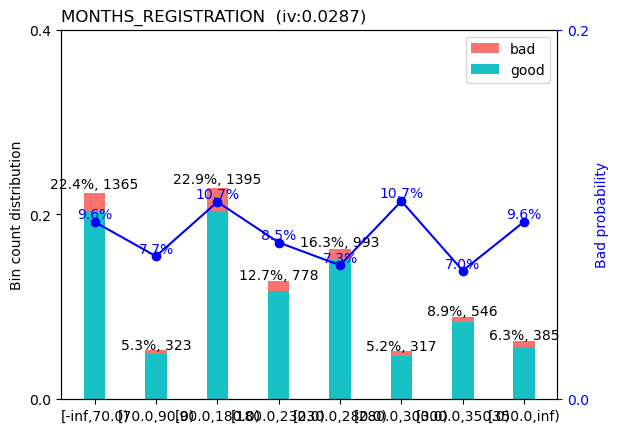

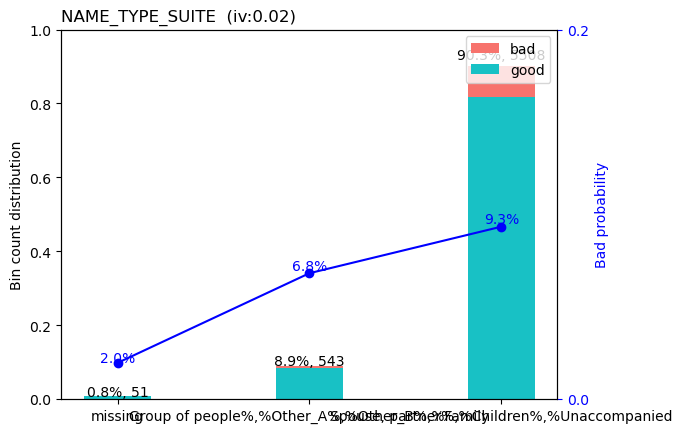

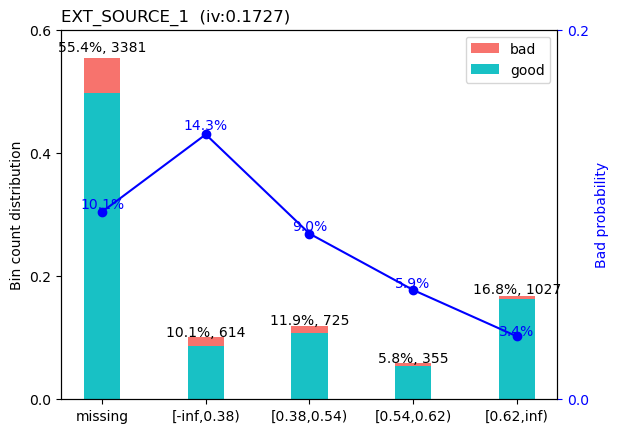

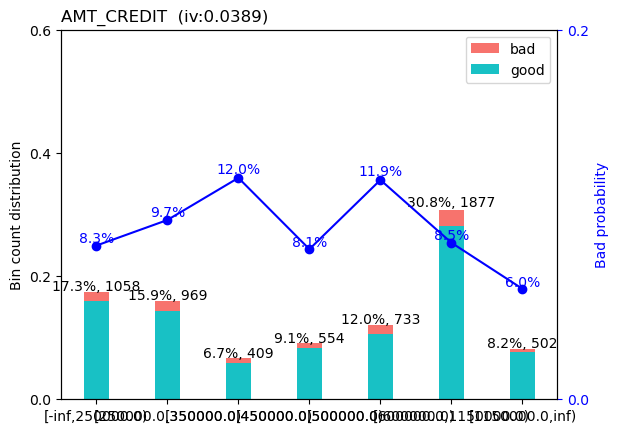

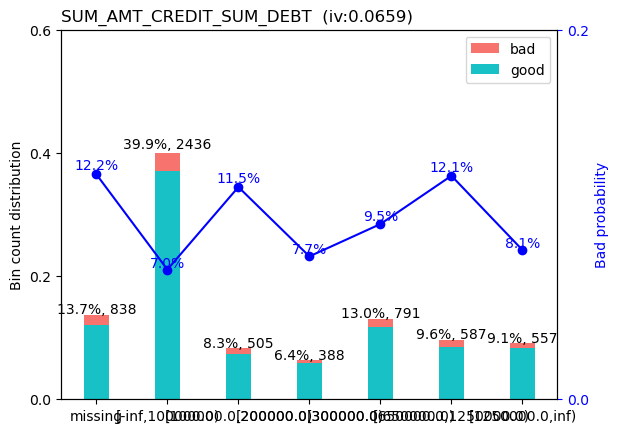

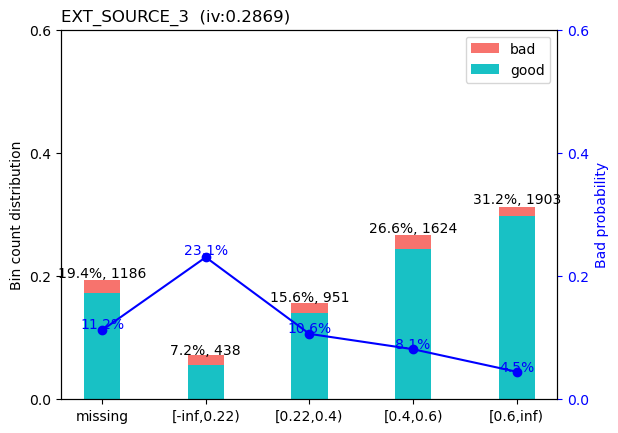

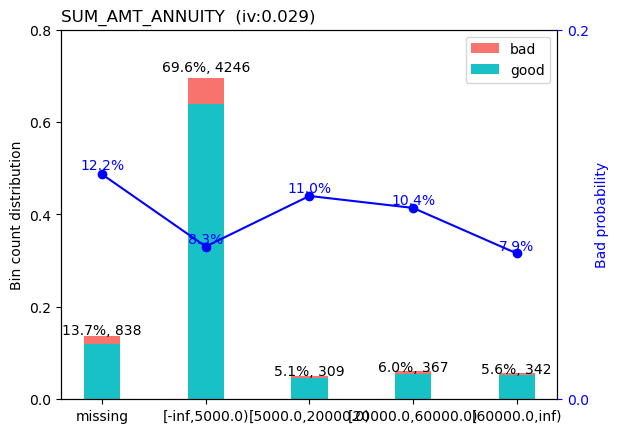

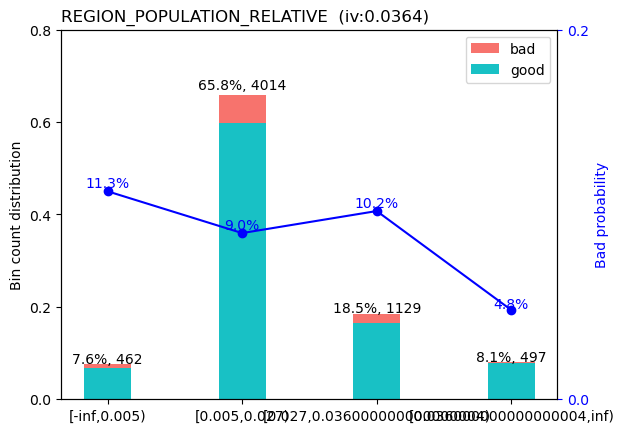

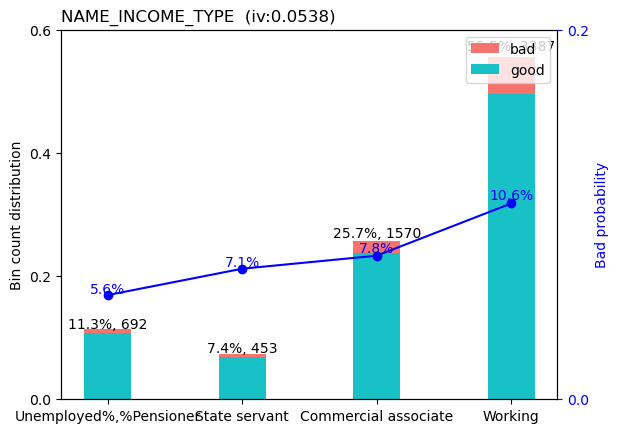

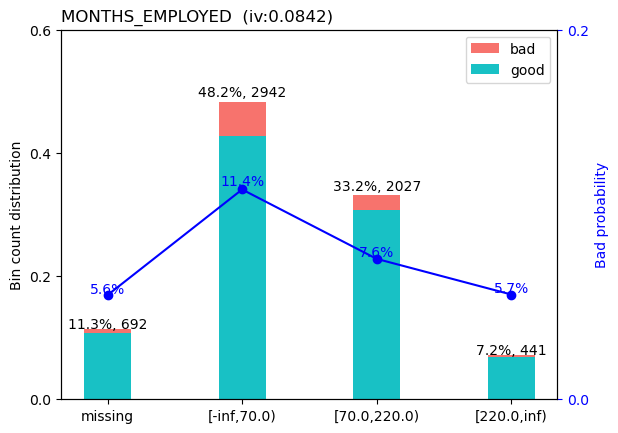

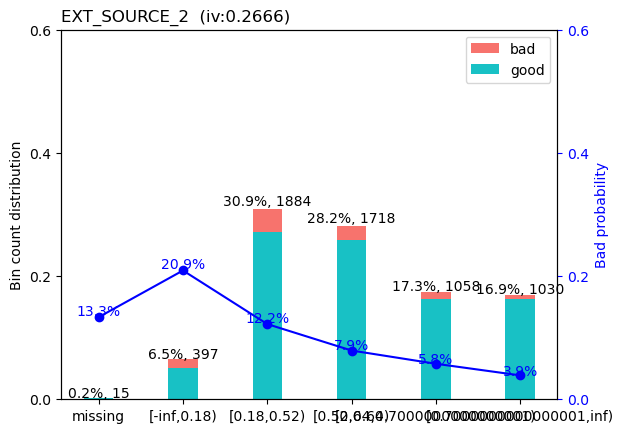

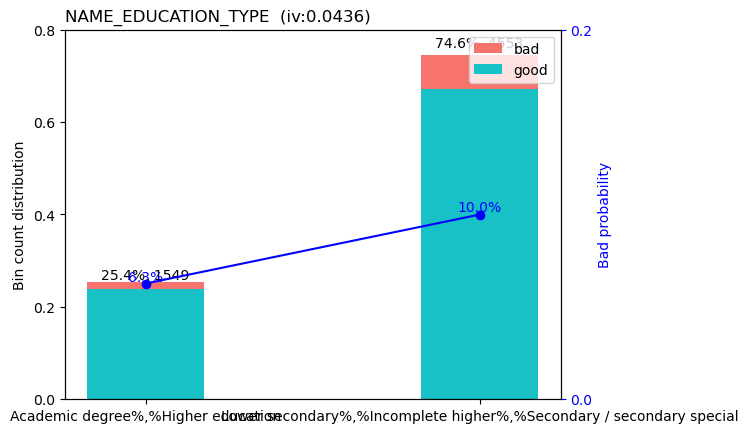

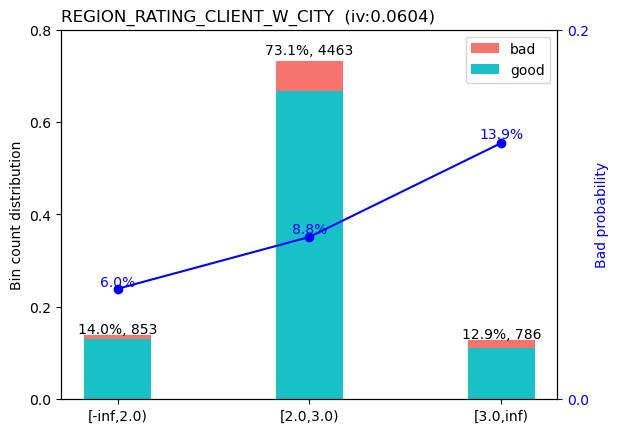

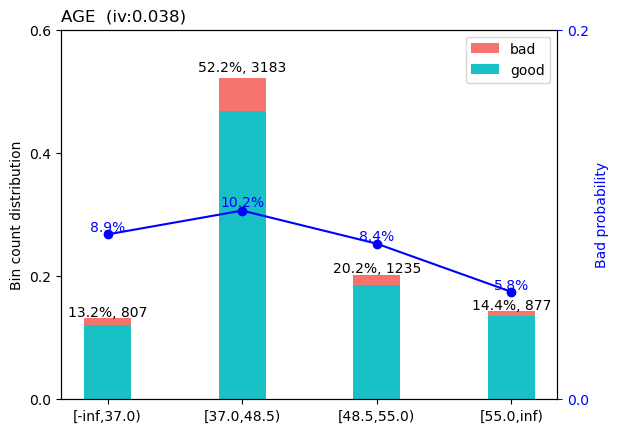

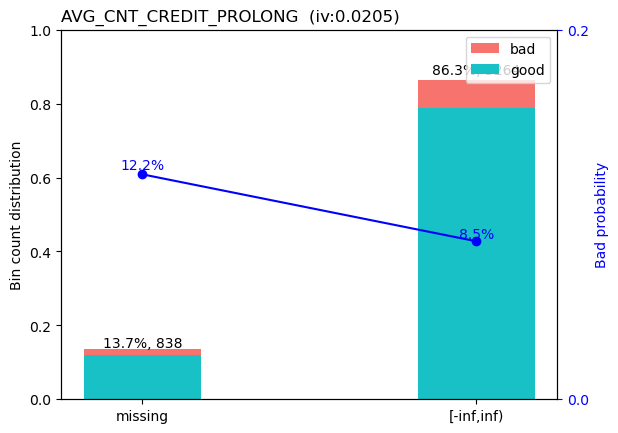

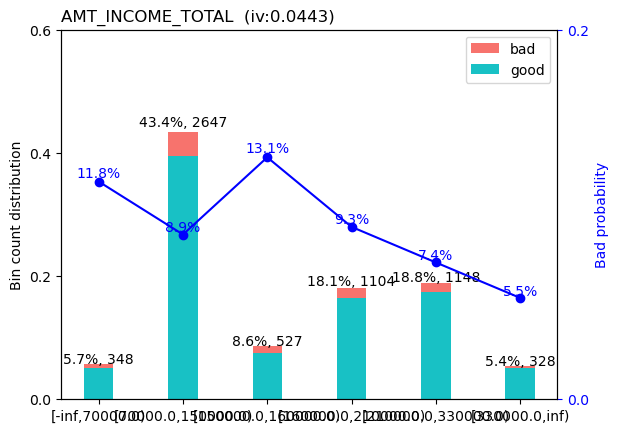

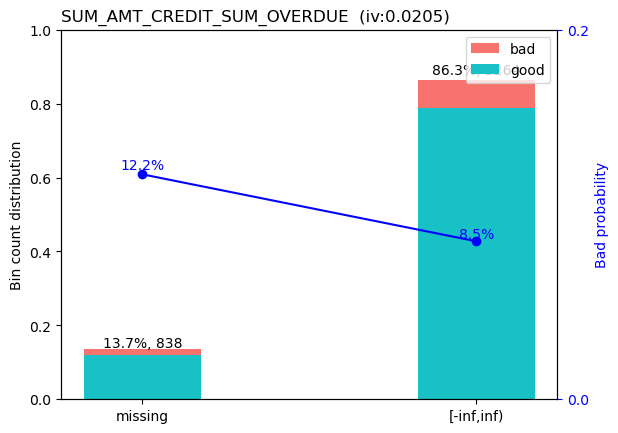

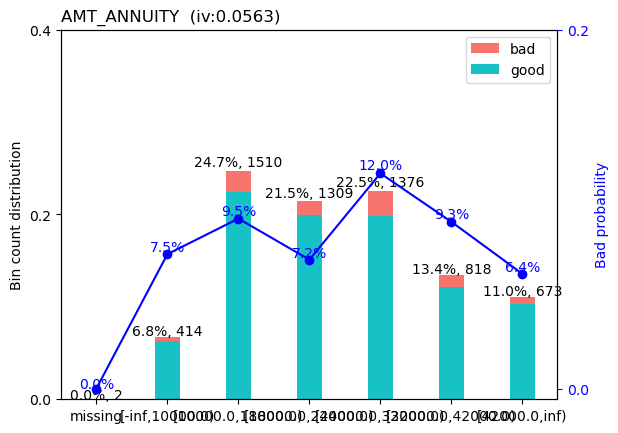

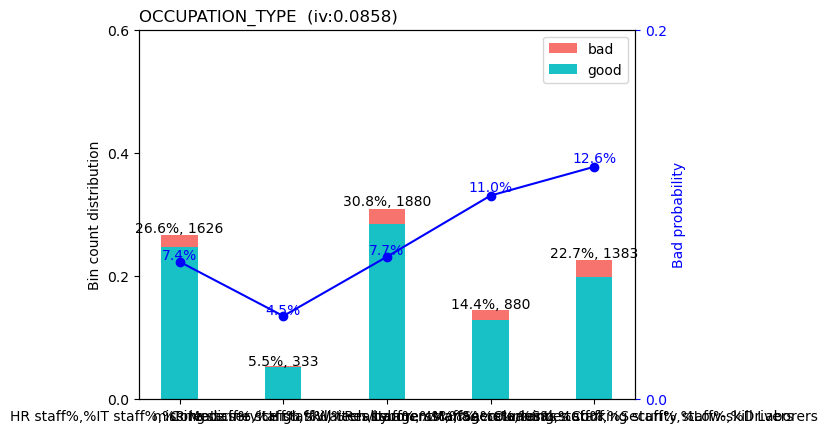

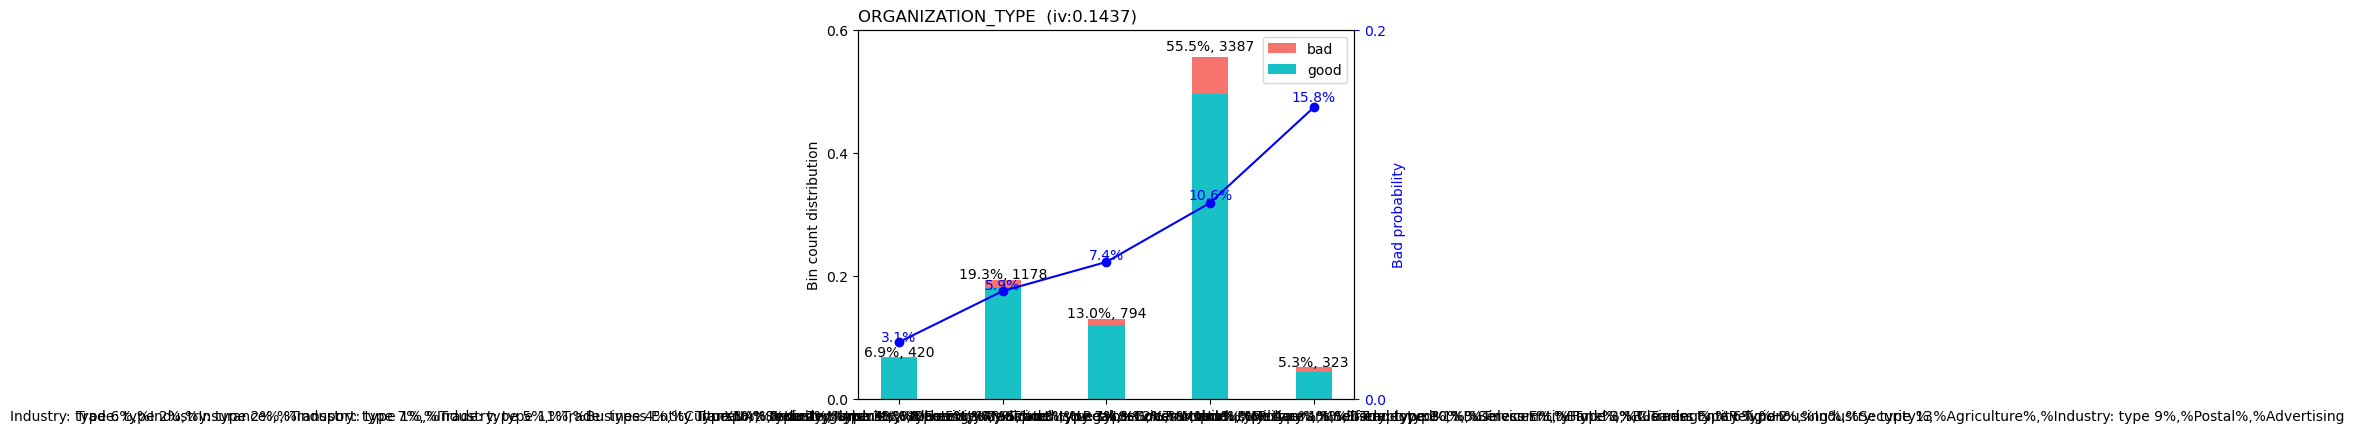

In [30]:
sc.woebin_plot(bins)

## Bin tuning

### Adjust characteristic bins for monotonicity


In [31]:
#Remove variables with no clear trend
df.drop(['MONTHS_REGISTRATION', 'AMT_CREDIT', 'SUM_AMT_CREDIT_SUM_DEBT', 'AVG_CNT_CREDIT_PROLONG', 'SUM_AMT_CREDIT_SUM_OVERDUE'], axis='columns', inplace = True)

# breaks_adj is a dictionary housing the adjusted bins for each variable, specified in the form 'var': [_,_,_]
# TODO: adjust bins for non-monotonic variables
breaks_adj = {'AMT_ANNUITY':[42000], 'AMT_GOODS_PRICE': [600000,900000,1100000], 
              'AMT_INCOME_TOTAL': [70000,160000,210000,330000], 'AGE': [35, 48.5, 55], 'SUM_AMT_ANNUITY': [60000],
              'REGION_POPULATION_RELATIVE': [0.005,0.036]
              }

bins2 = sc.woebin(df, y='TARGET', breaks_list=breaks_adj, method='tree', no_cores=6, check_cate_num= False)

[INFO] creating woe binning ...


In [32]:
characteristic_iv_org = []
characteristic_iv = []
cols_to_keep = ['TARGET']

for key in bins2.keys():
    iv = bins2[key]['total_iv'].mean()
    characteristic_iv_org.append([key, iv])
    if iv > 0.02:
        cols_to_keep.append(key)
        characteristic_iv.append([key, iv])

print(pd.DataFrame(characteristic_iv_org, columns = ['characteristic', 'IV']).sort_values(by = 'IV', ascending = False).reset_index())
print('\n\n')
print(pd.DataFrame(characteristic_iv, columns = ['characteristic', 'IV']).sort_values(by = 'IV', ascending = False).reset_index())

    index               characteristic        IV
0       2                 EXT_SOURCE_3  0.286892
1       7                 EXT_SOURCE_2  0.266630
2       1                 EXT_SOURCE_1  0.172690
3      14            ORGANIZATION_TYPE  0.143714
4      13              OCCUPATION_TYPE  0.085808
5       6              MONTHS_EMPLOYED  0.084222
6       9  REGION_RATING_CLIENT_W_CITY  0.060424
7       5             NAME_INCOME_TYPE  0.053806
8       8          NAME_EDUCATION_TYPE  0.043638
9      10                          AGE  0.035669
10      4   REGION_POPULATION_RELATIVE  0.033578
11     11             AMT_INCOME_TOTAL  0.028875
12      3              SUM_AMT_ANNUITY  0.020966
13      0              NAME_TYPE_SUITE  0.020044
14     12                  AMT_ANNUITY  0.016742



    index               characteristic        IV
0       2                 EXT_SOURCE_3  0.286892
1       7                 EXT_SOURCE_2  0.266630
2       1                 EXT_SOURCE_1  0.172690
3      13        

In [33]:
# Update df to use latest variables based on bins2
df = df[cols_to_keep]
df

TARGET NAME_TYPE_SUITE  EXT_SOURCE_1  EXT_SOURCE_3  SUM_AMT_ANNUITY  \
0          0          Family           NaN      0.169429         4653.000   
1          0   Unaccompanied      0.414794      0.477649            0.000   
2          0   Unaccompanied      0.475762      0.789880         3997.485   
3          0   Unaccompanied           NaN      0.729567            0.000   
4          1          Family           NaN      0.115387        12163.500   
...      ...             ...           ...           ...              ...   
6097       0   Unaccompanied      0.896452      0.636376            0.000   
6098       1   Unaccompanied           NaN           NaN              NaN   
6099       0   Unaccompanied      0.657671      0.477649            0.000   
6100       0   Unaccompanied      0.323674      0.644679        40986.000   
6101       0   Unaccompanied      0.662429      0.510090            0.000   

      REGION_POPULATION_RELATIVE      NAME_INCOME_TYPE  MONTHS_EMPLOYED  \
0                       0.019101             Pensioner              NaN   
1                       0.024610               Working         6.400000   
2                       0.028663               Working       266.000000   
3                       0.019101  Commercial associate        48.366667   
4                       0.025164             Pensioner              NaN   
...                          ...                   ...              ...   
6097                    0.046220               Working         9.533333   
6098                    0.030755               Working        84.666667   
6099                    0.018029               Working        39.566667   
6100                    0.024610               Working        37.566667   
6101                    0.025164               Working       155.933333   

      EXT_SOURCE_2            NAME_EDUCATION_TYPE  \
0         0.622708  Secondary / secondary special   
1         0.661108  Secondary / secondary special   
2         0.593019  Secondary / secondary special   
3         0.695219               Higher education   
4         0.293988  Secondary / secondary special   
...            ...                            ...   
6097      0.644973               Higher education   
6098      0.581443  Secondary / secondary special   
6099      0.557887               Higher education   
6100      0.134254  Secondary / secondary special   
6101      0.645418               Higher education   

      REGION_RATING_CLIENT_W_CITY        AGE  AMT_INCOME_TOTAL  \
0                               2  59.235616           67500.0   
1                               2  39.235616          126000.0   
2                               2  41.471233           76500.0   
3                               2  45.265753          135000.0   
4                               2  37.553425          112500.0   
...                           ...        ...               ...   
6097                            1  52.347945          256500.0   
6098                            2  37.293151          135000.0   
6099                            3  38.383562          360000.0   
6100                            2  50.202740           90000.0   
6101                            2  41.545205          270000.0   

         OCCUPATION_TYPE       ORGANIZATION_TYPE  
0                    NaN                     XNA  
1               Laborers       Transport: type 4  
2     Low-skill Laborers             Agriculture  
3            Accountants  Business Entity Type 3  
4                    NaN                     XNA  
...                  ...                     ...  
6097         Accountants           Trade: type 7  
6098            Laborers                 Housing  
6099          Core staff                  School  
6100                 NaN       Transport: type 4  
6101                 NaN                   Other  

[6102 rows x 15 columns]

{'NAME_TYPE_SUITE': <Figure size 640x480 with 2 Axes>,
 'EXT_SOURCE_1': <Figure size 640x480 with 2 Axes>,
 'EXT_SOURCE_3': <Figure size 640x480 with 2 Axes>,
 'SUM_AMT_ANNUITY': <Figure size 640x480 with 2 Axes>,
 'REGION_POPULATION_RELATIVE': <Figure size 640x480 with 2 Axes>,
 'NAME_INCOME_TYPE': <Figure size 640x480 with 2 Axes>,
 'MONTHS_EMPLOYED': <Figure size 640x480 with 2 Axes>,
 'EXT_SOURCE_2': <Figure size 640x480 with 2 Axes>,
 'NAME_EDUCATION_TYPE': <Figure size 640x480 with 2 Axes>,
 'REGION_RATING_CLIENT_W_CITY': <Figure size 640x480 with 2 Axes>,
 'AGE': <Figure size 640x480 with 2 Axes>,
 'AMT_INCOME_TOTAL': <Figure size 640x480 with 2 Axes>,
 'AMT_ANNUITY': <Figure size 640x480 with 2 Axes>,
 'OCCUPATION_TYPE': <Figure size 640x480 with 2 Axes>,
 'ORGANIZATION_TYPE': <Figure size 640x480 with 2 Axes>}

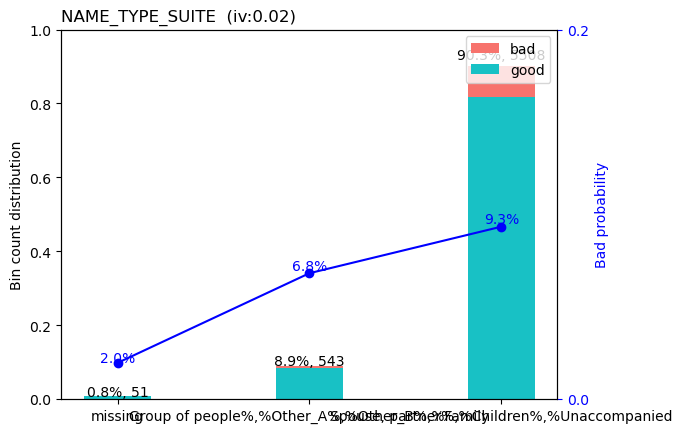

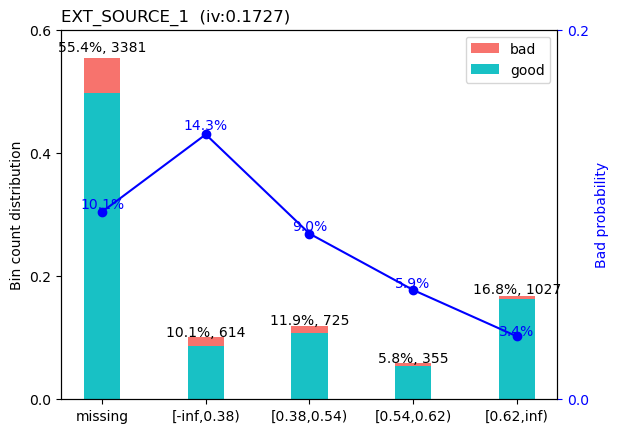

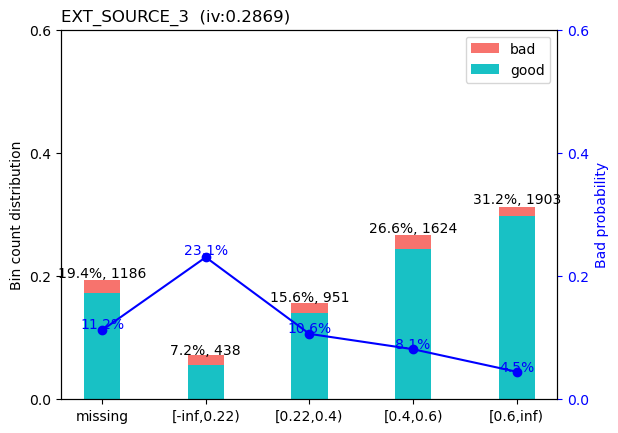

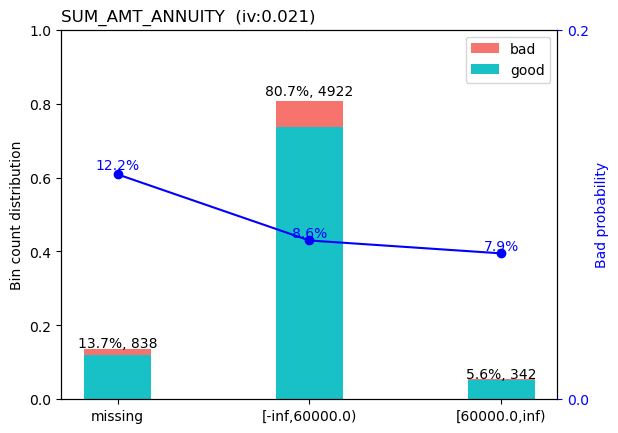

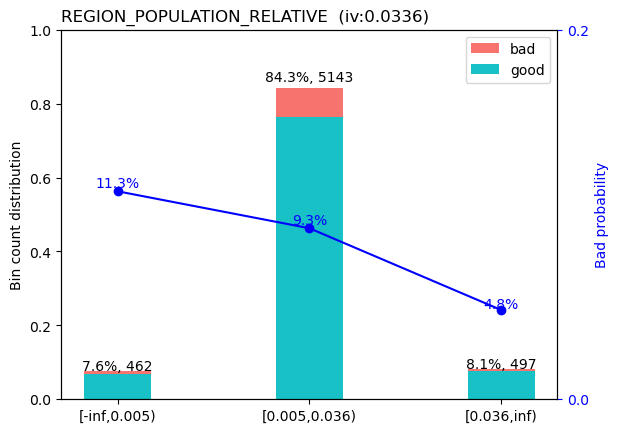

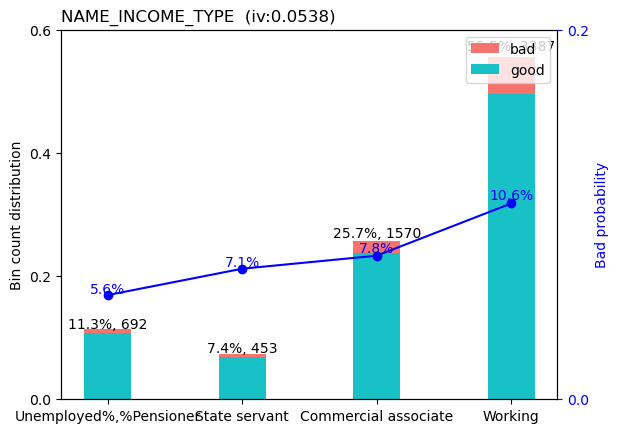

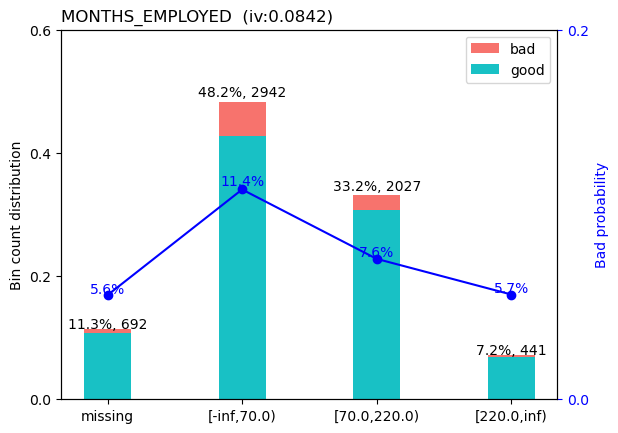

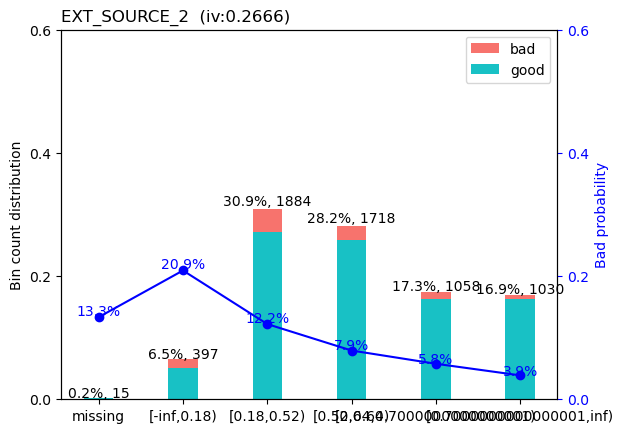

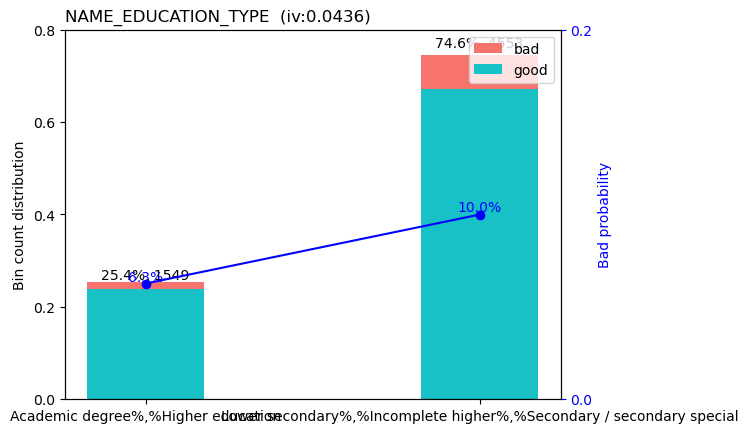

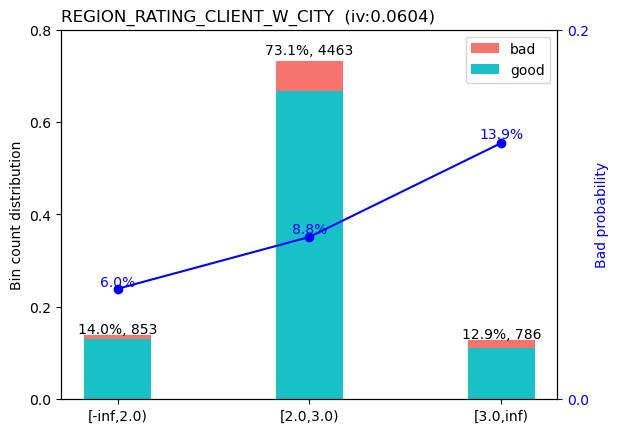

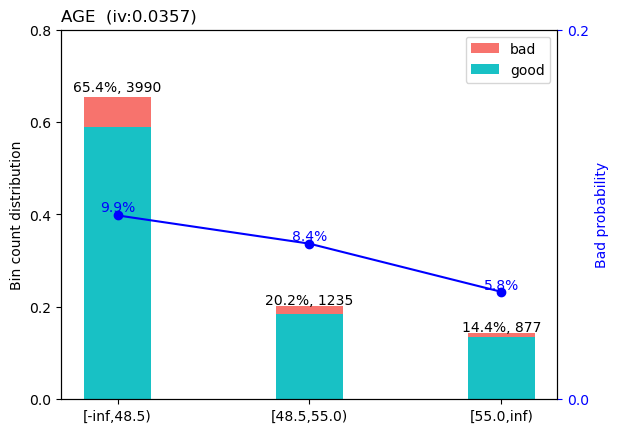

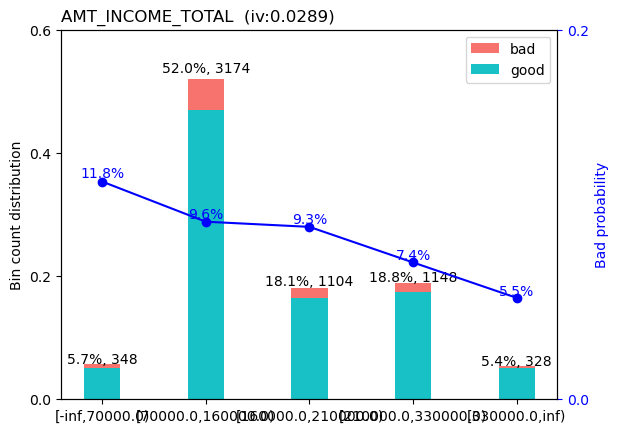

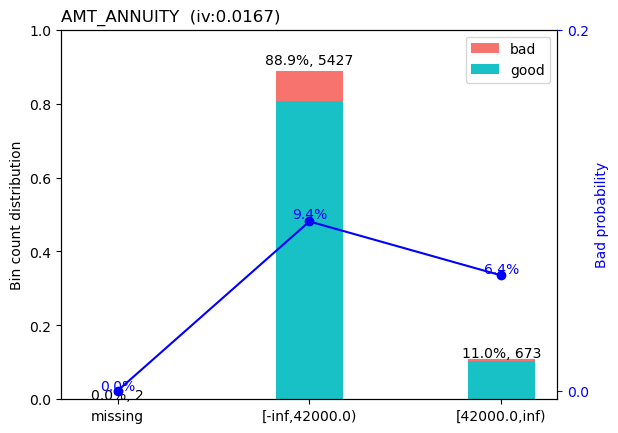

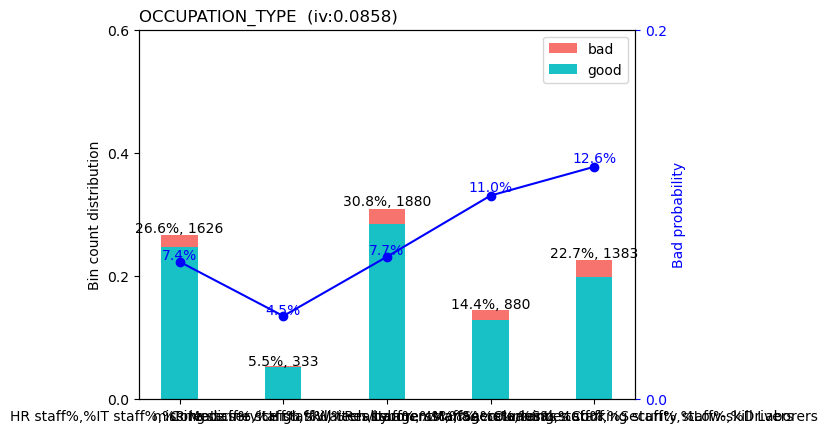

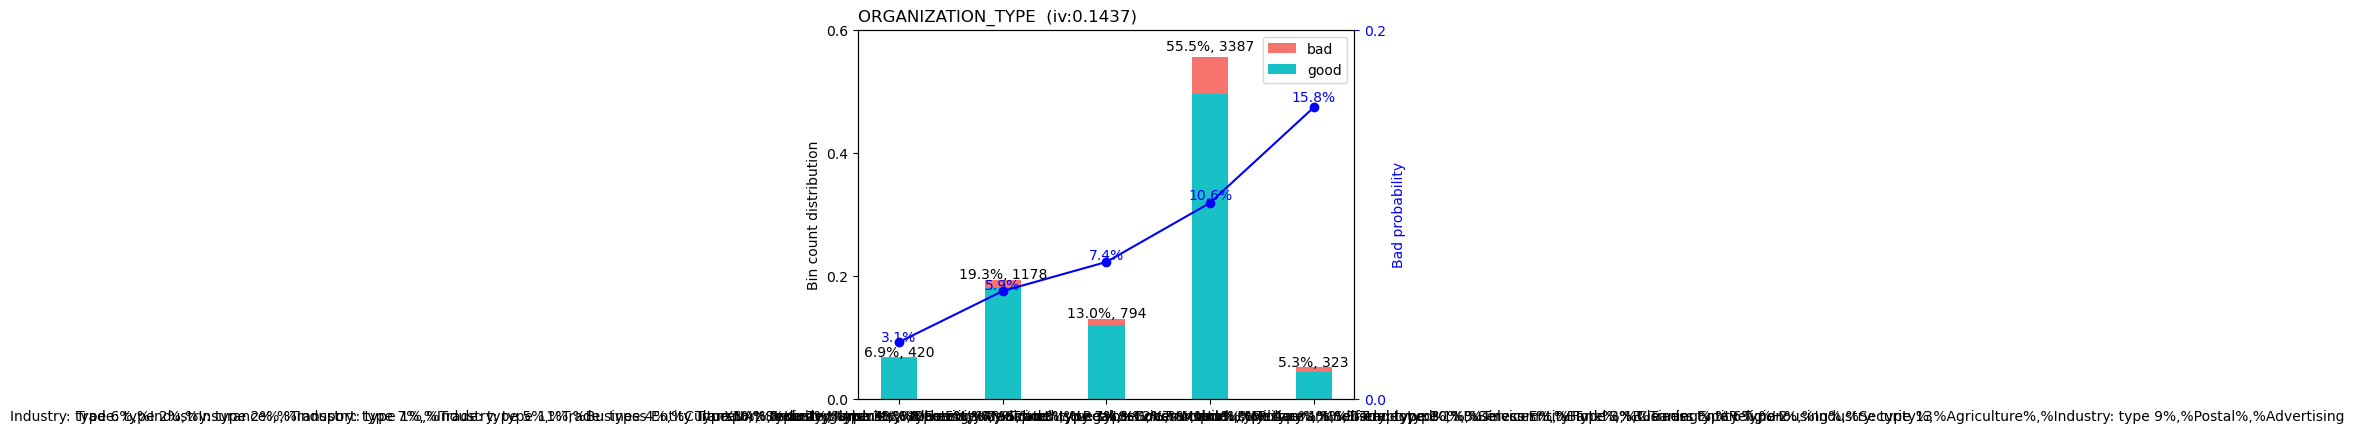

In [34]:
# plot the bins
sc.woebin_plot(bins2)

## Logistic Regression

In [35]:
# split data into 70% train and 30% test
train, test = sc.split_df(df, 'TARGET', ratio=0.7).values()
print(train.shape)
print(test.shape)

(4271, 15)
(1831, 15)


In [36]:
print(train['TARGET'].value_counts())
print(test['TARGET'].value_counts())

TARGET
0    3885
1     386
Name: count, dtype: int64
TARGET
0    1665
1     166
Name: count, dtype: int64


In [37]:
# prepare a dataset with the WOE values for Logistic Regression training
# woebin_ply() converts original values of input data into woe
train_woe = sc.woebin_ply(train, bins2)
test_woe = sc.woebin_ply(test, bins2)
train_woe

[INFO] converting into woe values ...
[INFO] converting into woe values ...


TARGET  NAME_TYPE_SUITE_woe  EXT_SOURCE_1_woe  MONTHS_EMPLOYED_woe  \
0          0            -0.307614          0.126781            -0.510010   
1          0             0.034236         -0.009847             0.252807   
3          0             0.034236          0.126781             0.252807   
4          1            -0.307614          0.126781            -0.510010   
5          0             0.034236          0.126781            -0.190339   
...      ...                  ...               ...                  ...   
6096       0             0.034236         -1.036370            -0.190339   
6097       0             0.034236         -1.036370             0.252807   
6099       0             0.034236         -1.036370             0.252807   
6100       0             0.034236          0.520041             0.252807   
6101       0             0.034236         -1.036370            -0.190339   

      EXT_SOURCE_2_woe  NAME_EDUCATION_TYPE_woe  \
0            -0.145785                 0.110048   
1            -0.485872                 0.110048   
3            -0.485872                -0.397981   
4             0.335133                 0.110048   
5            -0.485872                -0.397981   
...                ...                      ...   
6096         -0.900820                -0.397981   
6097         -0.485872                -0.397981   
6099         -0.145785                -0.397981   
6100          0.977453                 0.110048   
6101         -0.485872                -0.397981   

      REGION_RATING_CLIENT_W_CITY_woe   AGE_woe  AMT_INCOME_TOTAL_woe  \
0                           -0.032377 -0.476764              0.294729   
1                           -0.032377  0.105199              0.066598   
3                           -0.032377  0.105199              0.066598   
4                           -0.032377  0.105199              0.066598   
5                           -0.447278 -0.078461             -0.538195   
...                               ...       ...                   ...   
6096                        -0.032377  0.105199              0.066598   
6097                        -0.447278 -0.078461             -0.218194   
6099                         0.481682  0.105199             -0.538195   
6100                        -0.032377 -0.078461              0.066598   
6101                        -0.032377  0.105199             -0.218194   

      OCCUPATION_TYPE_woe  EXT_SOURCE_3_woe  ORGANIZATION_TYPE_woe  \
0               -0.212752          1.103043              -0.469102   
1                0.369512         -0.117066              -0.469102   
3               -0.745996         -0.754836               0.178782   
4               -0.212752          1.103043              -0.469102   
5               -0.174024          0.177889               0.178782   
...                   ...               ...                    ...   
6096            -0.212752         -0.754836               0.178782   
6097            -0.745996         -0.754836               0.178782   
6099            -0.174024         -0.117066              -0.469102   
6100            -0.212752         -0.754836              -0.469102   
6101            -0.212752         -0.117066              -0.214328   

      SUM_AMT_ANNUITY_woe  REGION_POPULATION_RELATIVE_woe  \
0               -0.056233                        0.025151   
1               -0.056233                        0.025151   
3               -0.056233                        0.025151   
4               -0.056233                        0.025151   
5               -0.056233                       -0.673036   
...                   ...                             ...   
6096            -0.056233                        0.025151   
6097            -0.056233                       -0.673036   
6099            -0.056233                        0.025151   
6100            -0.056233                        0.025151   
6101            -0.056233                        0.025151   

      NAME_INCOME_TYPE_woe  


# Function to loop through various weights

In [38]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

def evaluate_model(X_train, y_train, X_test, y_test, default_weight):
    non_default_weight = 1 - default_weight
    # create a logistic regression model object
    lr = LogisticRegression(class_weight={0: non_default_weight, 1: default_weight})
    lr.fit(X_train, y_train)
#     print(lr.coef_)
#     print(lr.intercept_)
    
    # generate a card from the model and bins. The scores will be based on the probability of default from the model
    card = sc.scorecard(bins, lr, X_train.columns, points0=600, odds0=1/50, pdo=20,
          basepoints_eq0=True)

#     pprint.pprint(card)
    
    # credit score for samples in test and train
    train_score = sc.scorecard_ply(train, card)
    test_score = sc.scorecard_ply(test, card)

    # distribution of scores on test data
#     train_score.hist(figsize=(7, 5), bins=60)
#     plt.title('train data scores')
#     test_score.hist(figsize=(7, 5), bins=60)
#     plt.title('test data scores')
    
    # print evaluation metrics of the model
    y_pred = lr.predict(X_test)

    print("Confusion matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nPCC measures:")
    class_report = classification_report(y_test, y_pred)
    print(class_report)
    
    # evaluate the performance of the logistic regression
    train_pred = lr.predict_proba(X_train)[:,1]
    test_pred = lr.predict_proba(X_test)[:,1]

    # performance ks & roc
#     train_perf = sc.perf_eva(y_train, train_pred, plot_type=['roc'], title="train")
#     test_perf = sc.perf_eva(y_test, test_pred, plot_type=['roc'], title="test")
    
    # Calculate and return the AUC score
    auc_score = roc_auc_score(y_test, test_pred)
    
    return class_report, auc_score

In [39]:
y_train = train_woe.loc[:,'TARGET']
X_train = train_woe.loc[:,train_woe.columns != 'TARGET']
y_test = test_woe.loc[:,'TARGET']
X_test = test_woe.loc[:,train_woe.columns != 'TARGET']

# Try positive_weight from 0.5 to 0.96, increment by 0.02
for default_weight in range(50, 96, 2):
    default_weight = default_weight / 100
    report, auc_score = evaluate_model(X_train, y_train, X_test, y_test, default_weight)
    print("Weight: ", default_weight)
    print("AUC Score: ", auc_score, "\n\n")


Confusion matrix:
[[1665    0]
 [ 165    1]]

PCC measures:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1665
           1       1.00      0.01      0.01       166

    accuracy                           0.91      1831
   macro avg       0.95      0.50      0.48      1831
weighted avg       0.92      0.91      0.87      1831

Weight:  0.5
AUC Score:  0.732915445566048 


Confusion matrix:
[[1665    0]
 [ 165    1]]

PCC measures:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1665
           1       1.00      0.01      0.01       166

    accuracy                           0.91      1831
   macro avg       0.95      0.50      0.48      1831
weighted avg       0.92      0.91      0.87      1831

Weight:  0.52
AUC Score:  0.7329118274901407 


Confusion matrix:
[[1664    1]
 [ 165    1]]

PCC measures:
              precision    recall  f1-score   support

           0     

Confusion matrix:
[[1323  342]
 [  78   88]]

PCC measures:
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      1665
           1       0.20      0.53      0.30       166

    accuracy                           0.77      1831
   macro avg       0.57      0.66      0.58      1831
weighted avg       0.88      0.77      0.81      1831

Weight:  0.88
AUC Score:  0.7317829878070843 


Confusion matrix:
[[1202  463]
 [  63  103]]

PCC measures:
              precision    recall  f1-score   support

           0       0.95      0.72      0.82      1665
           1       0.18      0.62      0.28       166

    accuracy                           0.71      1831
   macro avg       0.57      0.67      0.55      1831
weighted avg       0.88      0.71      0.77      1831

Weight:  0.9
AUC Score:  0.7316346466948875 


Confusion matrix:
[[1016  649]
 [  46  120]]

PCC measures:
              precision    recall  f1-score   support

           0    

# Class weight of 0.88 is determined to be most optimal

In [40]:
optimal_weight = 0.88

lr = LogisticRegression(class_weight={0: (1-optimal_weight), 1: optimal_weight})
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)


[[ 0.71762735  0.66714569  0.35951223  0.70064779  0.49001566  0.49118567
  -0.23539953 -0.25227857  0.39543571  0.86731561  0.47310837  0.15876134
   0.19085807 -0.00181756]]
[-0.32348828]


In [41]:
# generate a card from the model and bins. The scores will be based on the probability of default from the model
card = sc.scorecard(bins2, lr, X_train.columns, points0=600, odds0=1/50, pdo=20,
      basepoints_eq0=True)

pprint.pprint(card)

{'AGE':    variable          bin  points
38      AGE  [-inf,48.5)    36.0
39      AGE  [48.5,55.0)    35.0
40      AGE   [55.0,inf)    32.0,
 'AMT_INCOME_TOTAL':             variable                  bin  points
41  AMT_INCOME_TOTAL       [-inf,70000.0)    38.0
42  AMT_INCOME_TOTAL   [70000.0,160000.0)    36.0
43  AMT_INCOME_TOTAL  [160000.0,210000.0)    36.0
44  AMT_INCOME_TOTAL  [210000.0,330000.0)    34.0
45  AMT_INCOME_TOTAL       [330000.0,inf)    32.0,
 'EXT_SOURCE_1':        variable          bin  points
3  EXT_SOURCE_1      missing    33.0
4  EXT_SOURCE_1  [-inf,0.38)    25.0
5  EXT_SOURCE_1  [0.38,0.54)    36.0
6  EXT_SOURCE_1  [0.54,0.62)    44.0
7  EXT_SOURCE_1   [0.62,inf)    55.0,
 'EXT_SOURCE_2':         variable                        bin  points
27  EXT_SOURCE_2                    missing    27.0
28  EXT_SOURCE_2                [-inf,0.18)    16.0
29  EXT_SOURCE_2                [0.18,0.52)    29.0
30  EXT_SOURCE_2                [0.52,0.64)    38.0
31  EXT_SOURCE_2  [0

Text(0.5, 1.0, 'test data scores')

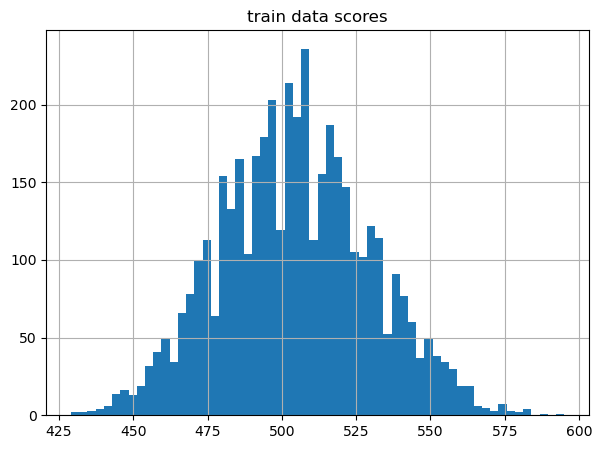

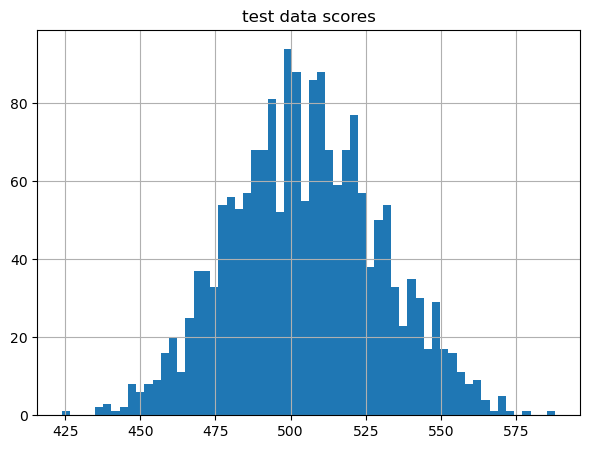

In [42]:
# credit score for samples in test and train
train_score = sc.scorecard_ply(train, card)
test_score = sc.scorecard_ply(test, card)

# distribution of scores on test data
train_score.hist(figsize=(7, 5), bins=60)
plt.title('train data scores')
test_score.hist(figsize=(7, 5), bins=60)
plt.title('test data scores')

Confusion matrix:
[[1323  342]
 [  78   88]]

PCC measures:
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      1665
           1       0.20      0.53      0.30       166

    accuracy                           0.77      1831
   macro avg       0.57      0.66      0.58      1831
weighted avg       0.88      0.77      0.81      1831



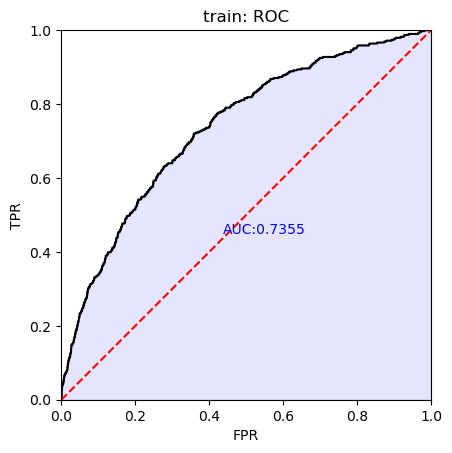

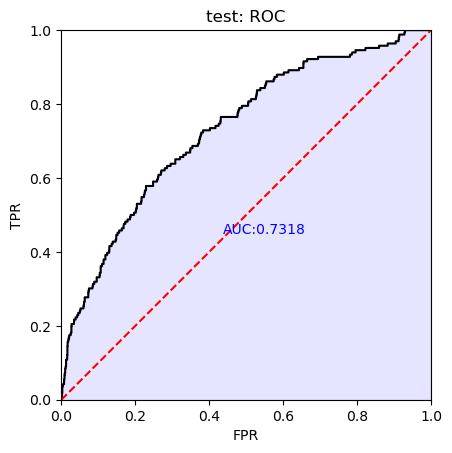

0.7317829878070843


In [43]:
# print evaluation metrics of the model
y_pred = lr.predict(X_test)

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nPCC measures:")
class_report = classification_report(y_test, y_pred)
print(class_report)

# evaluate the performance of the logistic regression
train_pred = lr.predict_proba(X_train)[:,1]
test_pred = lr.predict_proba(X_test)[:,1]

# performance ks & roc
train_perf = sc.perf_eva(y_train, train_pred, plot_type=['roc'], title="train")
test_perf = sc.perf_eva(y_test, test_pred, plot_type=['roc'], title="test")

# Calculate and return the AUC score
auc_score = roc_auc_score(y_test, test_pred)
print(auc_score)